# Exploratory Data Analysis (EDA) : Financial Efficiency and Performance Metrics Analysis of European Football Leagues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/clean_data.csv')
df.head()

,league,team,season,revenue,spent,competition,position,wins,ties,losses,...,log_league_spent,log_relative,log_relative_winsorized,net_cube_root,sqrt_goals_for,sqrt_goals_against,log_5_season_agg,winsorized_5_season_net,log_5_season_league_agg,log_5_season_relative
0,England,Manchester City,23,162.17,155.00,First Tier,1,28,5,5,...,8.039480,0.048790,0.048790,1.928293,9.695360,5.744563,6.574671,-169.94,9.191259,0.070419
1,England,Manchester City,22,93.80,138.90,First Tier,1,29,6,3,...,7.444833,0.078097,0.078097,-3.559526,9.949874,5.099020,6.779024,-169.94,9.092795,0.094206
2,England,Manchester City,21,64.00,173.40,First Tier,1,27,5,6,...,7.365813,0.104132,0.104132,-4.782692,9.110434,5.656854,6.863344,-169.94,9.088286,0.102532
3,England,Manchester City,20,71.00,169.82,First Tier,2,26,3,9,...,7.490529,0.090637,0.090637,-4.623260,10.099505,5.916080,6.899350,-169.94,9.074635,0.107485
4,England,Manchester City,19,57.60,78.59,First Tier,1,32,2,4,...,7.396949,0.047088,0.047088,-2.758486,9.746794,4.795832,6.829372,-169.94,9.008347,0.107103


## I. Introduction :

The financial landscape of European football has evolved significantly over the past few decades, driven by increasing revenues from broadcasting rights, sponsorships, and global fan engagement. However, with this financial growth comes the challenge of maintaining sustainable financial practices while striving for on-field success. This project aims to analyze the financial efficiency and performance metrics across various European football leagues, focusing on how financial spending correlates with team performance, identifying patterns and trends in financial efficiency over time, and comparing financial and performance metrics across different leagues.

By examining key metrics such as **revenue**, **spending**, **net balance**, **wins**, and **goals**, this analysis provides valuable insights into the financial strategies of top European leagues, including the English Premier League and La Liga. The project explores whether higher spending leads to better performance, how financial efficiency varies across leagues, and what trends can be observed over time. Through this analysis, we aim to uncover the financial dynamics that influence success in European football and highlight the differences in financial management between leagues.

## II. Descriptive Statistics

### 1. Descriptive Statistics for Categorical Columns

#### 1.1 Frequency Analysis of Categorical Columns

To gain a better understanding of the dataset's composition, we conducted a frequency analysis of the categorical columns, focusing on key variables such as **`league`**, **`competition`**, **`position`**, **`first_tier`** and **`team`**. This analysis provides insights into the distribution and representation of different categories within the dataset, helping to identify any potential biases or areas of emphasis.

In [3]:
# Summary statistics for categorical columns
categorical_summary = df.describe(include=['object'])
categorical_summary

,league,team,competition,position
count,3172,3172,3172,3172
unique,15,150,3,10
top,Netherlands,FC Utrecht,First Tier,≤10
freq,240,24,2728,1067


+ **`League`:**

    + There are **15** unique leagues represented in the dataset.
    + The **Netherlands** is the most frequently represented league, with **240** entries.
    + The **dominance** of the **Netherlands** suggests a **higher availability** of data from this league, which might influence the overall analysis, particularly when comparing trends across different leagues.

+ **`Team`:**

    + The dataset includes **150** unique teams.
    + **FC Utrecht** has the **highest** frequency with **24** entries.
    + **FC Utrecht’s** frequent presence in the dataset indicates that this team has been **well-documented**, possibly due to consistent participation or notable performance, making it a key player in the analysis.

+ **`Competition`:**

    + There are **3** levels of competition represented (e.g., **First Tier**, **Second Tier**, **Third Tier**).
    + The First Tier (**top division**) **dominates** the dataset, with **2728** entries.
    + The **heavy focus** on the **First Tier** suggests that the analysis will largely reflect the dynamics of top-tier leagues, with **less** emphasis on **lower divisions**.

+ **`Position`:**

    + There are **10** unique positions recorded, reflecting teams’ league standings.
    + The **≤10** position, indicating teams ranked **10th** or **lower**, appears most frequently with **1067** entries.
    + The frequent occurrence of lower-ranked positions suggests that a substantial portion of the dataset focuses on **mid- to lower-table** teams, which may influence the findings related to league competitiveness and financial performance.

#### 1.2 Visualization of Categorical Distributions

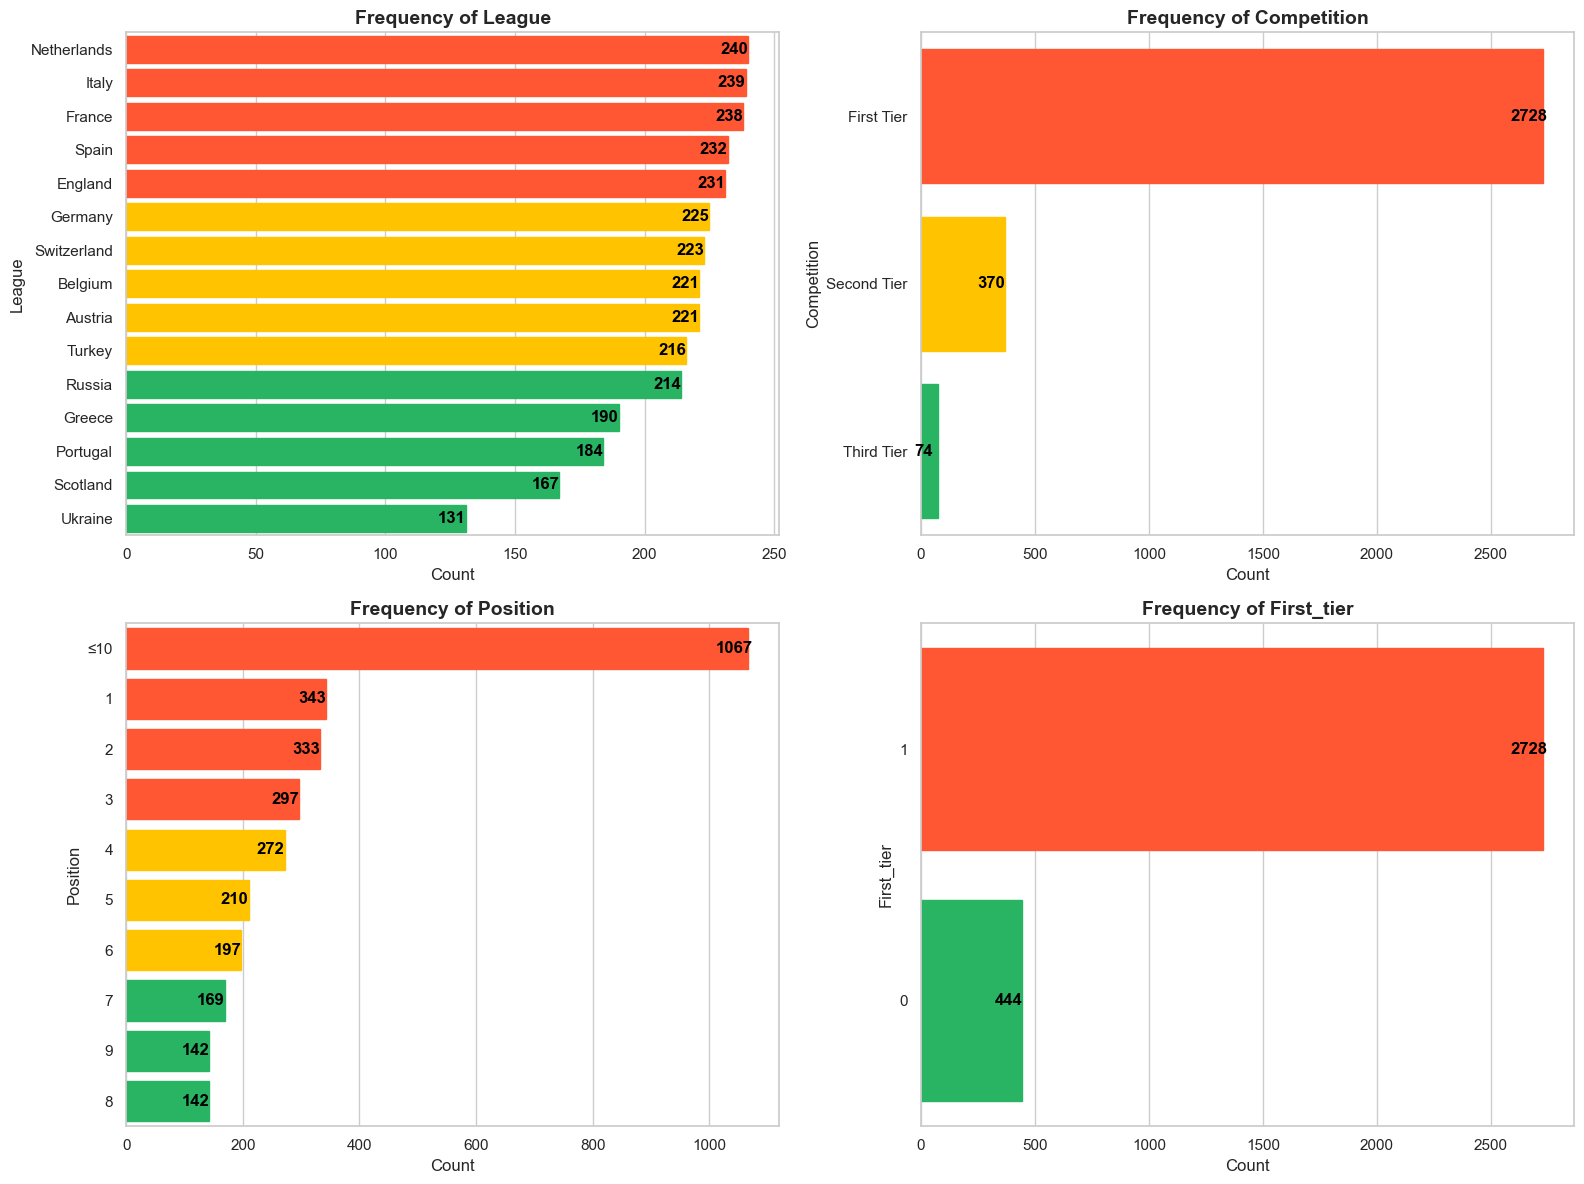

In [4]:
# Analyze categorical columns: 'league', 'competition', 'position', 'first_tier'
categorical_columns = ['league', 'competition', 'position', 'first_tier']

# Set up the plotting style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Define color shades for high, medium, and small categories
high_color = '#FF5733'    # Bright red-orange for high values
medium_color = '#FFC300'  # Golden yellow for medium values
small_color = '#28B463'   # Fresh green for small values

# Function to determine color based on value
def get_color(value, thresholds):
    if value > thresholds[1]:
        return high_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color

# Plot the frequency of each category
for i, col in enumerate(categorical_columns):
    # Get the counts for each category
    counts = df[col].value_counts()
    
    # Calculate the thresholds for small, medium, and high categories
    thresholds = [counts.quantile(0.33), counts.quantile(0.66)]
    
    # Create the count plot without specifying color, we'll handle it manually
    bar_plot = sns.countplot(y=df[col], ax=axes[i], order=counts.index)
    
    # Manually color the bars based on their count
    for p in bar_plot.patches:
        count = int(p.get_width())
        color = get_color(count, thresholds)
        p.set_color(color)
        
        # Add numbers on each bar
        bar_plot.annotate(f'{count}', xy=(count, p.get_y() + p.get_height() / 2),
                          xytext=(-10, 0), textcoords='offset points',  # Adjusted position to be closer to bars
                          ha='center', va='center', fontsize=12, color='black', fontweight='bold')

    # Set title and labels
    axes[i].set_title(f'Frequency of {col.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel(col.capitalize(), fontsize=12)

# Adjust layout to prevent overlap and show plot
plt.tight_layout()
plt.show()

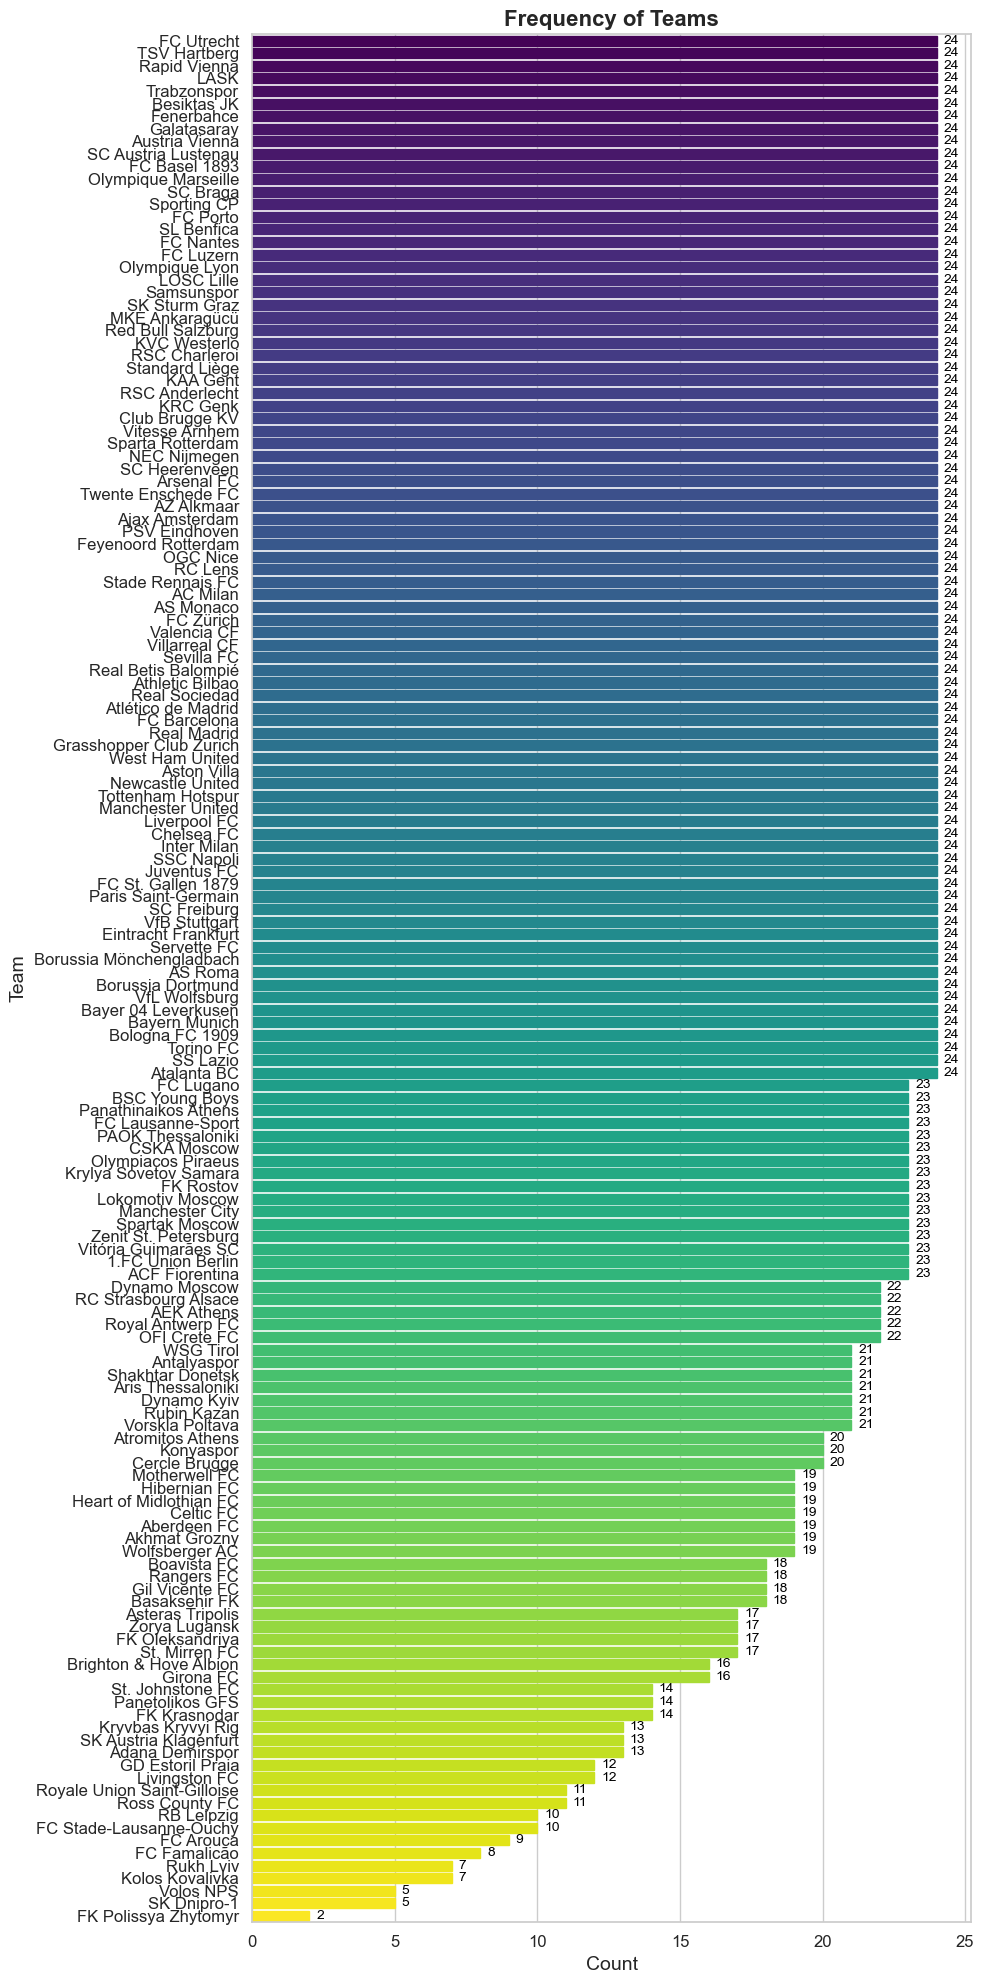

In [5]:
# Set the figure size to give more space for y-axis labels
plt.figure(figsize=(10, 20))  # Increase height to space out y-axis labels

# Define an attractive color palette
palette = sns.color_palette("viridis", len(df['team'].unique()))  # 'viridis' palette

# Create the count plot without using palette directly
bar_plot = sns.countplot(y='team', data=df, order=df['team'].value_counts().index, color=palette[0])

# Manually color the bars
for i, p in enumerate(bar_plot.patches):
    color = palette[i % len(palette)]
    p.set_color(color)
    
    # Add numbers near each bar
    count = int(p.get_width())  # Get the count for each bar
    bar_plot.annotate(f'{count}', xy=(count, p.get_y() + p.get_height() / 2),
                      xytext=(5, 0), textcoords='offset points',
                      ha='left', va='center', fontsize=10, color='black')

# Adjust the spacing of the labels and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title('Frequency of Teams', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ensure the plot fits well within the figure

# Show the plot
plt.show()

+ **`League`:**

The **bar plot** shows that the dataset includes teams from a **variety** of leagues, with the **Netherlands**, **Italy**, **France**, **Spain**, and **England** (**240 times**) having the highest representation. On the other end, **Ukraine** and **Scotland** have the least representation. The **higher representation** of certain leagues, such as the **Netherlands** and **Italy**, indicates that these leagues have more data entries in the dataset. This could be due to a **longer history** of data collection or a larger number of teams in these leagues. Conversely, leagues like **Ukraine** and **Scotland**, which have fewer entries, might be underrepresented, potentially affecting the overall analysis if league-specific trends are critical.

+ **`Competition`:**

The **bar plot** reveals that the **majority** of the data points belong to the **First Tier** (**top division**) leagues, with a **smaller number** of entries from **Second Tier** and **very few** from **Third Tier**. The dataset is predominantly composed of data from **top-tier **leagues, which means the analysis is likely to **focus on the financial and performance metrics** of the most competitive and financially **strong leagues**. The limited data from lower-tier leagues may restrict the ability to compare across different competition levels.

+ **`Position`:**

The **bar plot** shows that the majority of teams are categorized as **≤10**, that means include all teams finishing in positions **10th** or **lower**. The first few positions (**1st**, **2nd**, etc.) have fewer entries, indicating that top spots are more exclusive.

+ **`First Tier`:**

The **first_tier plot** shows that a significant **majority** of the data points are from teams playing in the **First Tier**, with **fewer** data points from teams **outside the top tier**. This confirms the focus on top-division teams in the dataset, which aligns with the objective of analyzing the financial and performance metrics of the most competitive teams. The lesser representation of lower-tier teams may limit insights into the dynamics of promotion and relegation or the financial challenges of teams outside the top tier.

+ **`Team`:**

The plot shows that there is a **wide range** of teams included in the dataset, with each team represented by a varying number of entries. The teams at the bottom of the plot (e.g., **FK Polissya Zhytomyr**, **SK Dnipro-1**) have the fewest entries, while those at the top (e.g., **FC Utrecht**, **TSV Hartberg**) have the most entries, with counts ranging up to **25**. The distribution suggests that the dataset includes a diverse set of teams from various leagues, but with an uneven representation. Some teams have significantly more data entries than others, which might indicate a more comprehensive coverage for certain teams. This could be due to **longer participation** in the league, more **consistent performance**, or better **data availability** for these teams.

### 1.3 Summary

The dataset comprises a diverse range of teams and leagues, with a predominant focus on top-tier competitions. The Netherlands emerges as the most frequently represented league, while FC Utrecht stands out as the most documented team. This heavy representation in certain leagues and teams could influence the overall analysis, particularly in comparisons across different leagues and tiers. The emphasis on First Tier leagues and teams positioned 10th or lower further suggests that the analysis will largely reflect the financial and competitive dynamics of top-division and mid- to lower-table teams, potentially limiting insights into lower-tier competitions.

### 2. Descriptive Statistics for Numerical Columns

#### 2.1. Review Summary Statistics

To gain insights into the dataset, we performed a detailed analysis of key numerical columns. First, we’ll review the summary statistics for the numerical columns. This includes measures like **mean**, **median**, **standard deviation**, **min**, and **max** values, which help us understand the **central tendency** and **spread** of the data.

In [6]:
# Summary of the categorical columns in the DataFrame
numerical_summary = df.describe()
numerical_summary.T

,count,mean,std,min,25%,50%,75%,max
season,3172.0,12.188209,6.839481,0.000000,6.000000,13.000000,18.000000,23.000000
revenue,3172.0,15.823082,29.878338,0.000000,0.193750,3.550000,18.200000,367.250000
spent,3172.0,19.406403,38.371314,0.000000,0.150000,3.865000,20.500000,611.490000
wins,3172.0,15.851198,5.697620,2.000000,11.000000,15.000000,20.000000,34.000000
ties,3172.0,8.463430,3.067554,1.000000,6.000000,8.000000,10.000000,26.000000
losses,3172.0,10.047289,4.745989,0.000000,6.000000,10.000000,14.000000,28.000000
league_spent,3172.0,250.165728,388.150086,1.730000,26.880000,95.140000,317.330000,3100.000000
relative,3172.0,0.093837,0.145101,0.000000,0.002630,0.037925,0.117299,1.000000
net,3172.0,-3.583321,29.901655,-543.630000,-4.635000,0.000000,2.900000,221.400000
goals_for,3172.0,53.943253,16.787332,13.000000,42.000000,52.000000,64.000000,121.000000


+ **`Season`:**

The **average** season year is approximately **12.19**, indicating that the dataset covers a broad time span. The **wide range (0 to 23)** suggests the inclusion of **multiple seasons**, allowing for **time-series** analysis.

+ **`Revenue`:**

Teams earn an **average** of **€15.82** million in **revenue**, but with a high **standard deviation** (**€29.88** million), indicating significant disparities in financial strength among teams. Some teams generate very **high revenues** (up to **€367.25** million), while others earn **little to nothing**.

+ **`Spent`:**

The **average** spending is **€19.41** million, slightly higher than the revenue, highlighting that many teams are spending **more than they earn**. The **maximum** spending recorded is **€611.49** million, showing the scale of financial investment in some teams.

+ **`Wins`** and **`Losses`:**

On **average**, teams **win** about **15.85** games per season and **lose 10.05** games. The **standard deviations** indicate **moderate variability**, meaning most teams have a similar number of wins and losses, with a **few outliers**.

+ **`Net`**:

The **average** net balance is **-€3.58** million, indicating that teams generally **run at a loss**, with some teams losing as much as **€543.63** million. This negative trend suggests that high spending does not always translate into financial stability.

+ **`Goals For`** and **`Goals Against`:**

Teams **score** an **average** of **53.94** goals and **concede 40.49** goals per season. The relatively low standard deviations imply that goal statistics are more consistent across teams compared to financial metrics.

+ **`Relative`** and **`5-Season Aggregates`:**

The relative spending (proportion of league’s total spending) **averages at 9.38%**, with a **maximum** of **100%**, indicating that some teams dominate their league’s spending. Over a 5-season period, the spending and net balances show even more significant disparities, with some teams spending as much as **€1.23** billion or losing up to **€724.78** million.

+ **Transformed Metrics:**

**Log** and **Square-Root** Transformations: These transformations were applied to financial and performance metrics to **normalize skewed** distributions and **reduce the impact of extreme outliers**, making the data more suitable for statistical analysis.

#### 2.2. Visualize Distributions

In [7]:
df.columns

Index(['league', 'team', 'season', 'revenue', 'spent', 'competition',
       'position', 'wins', 'ties', 'losses', 'league_spent', 'relative', 'net',
       'goals_for', 'goals_against', '5_season_agg', '5_season_net',
       '5_season_league_agg', '5_season_relative', 'first_tier', 'log_revenue',
       'log_spent', 'log_league_spent', 'log_relative',
       'log_relative_winsorized', 'net_cube_root', 'sqrt_goals_for',
       'sqrt_goals_against', 'log_5_season_agg', 'winsorized_5_season_net',
       'log_5_season_league_agg', 'log_5_season_relative'],
      dtype='object')

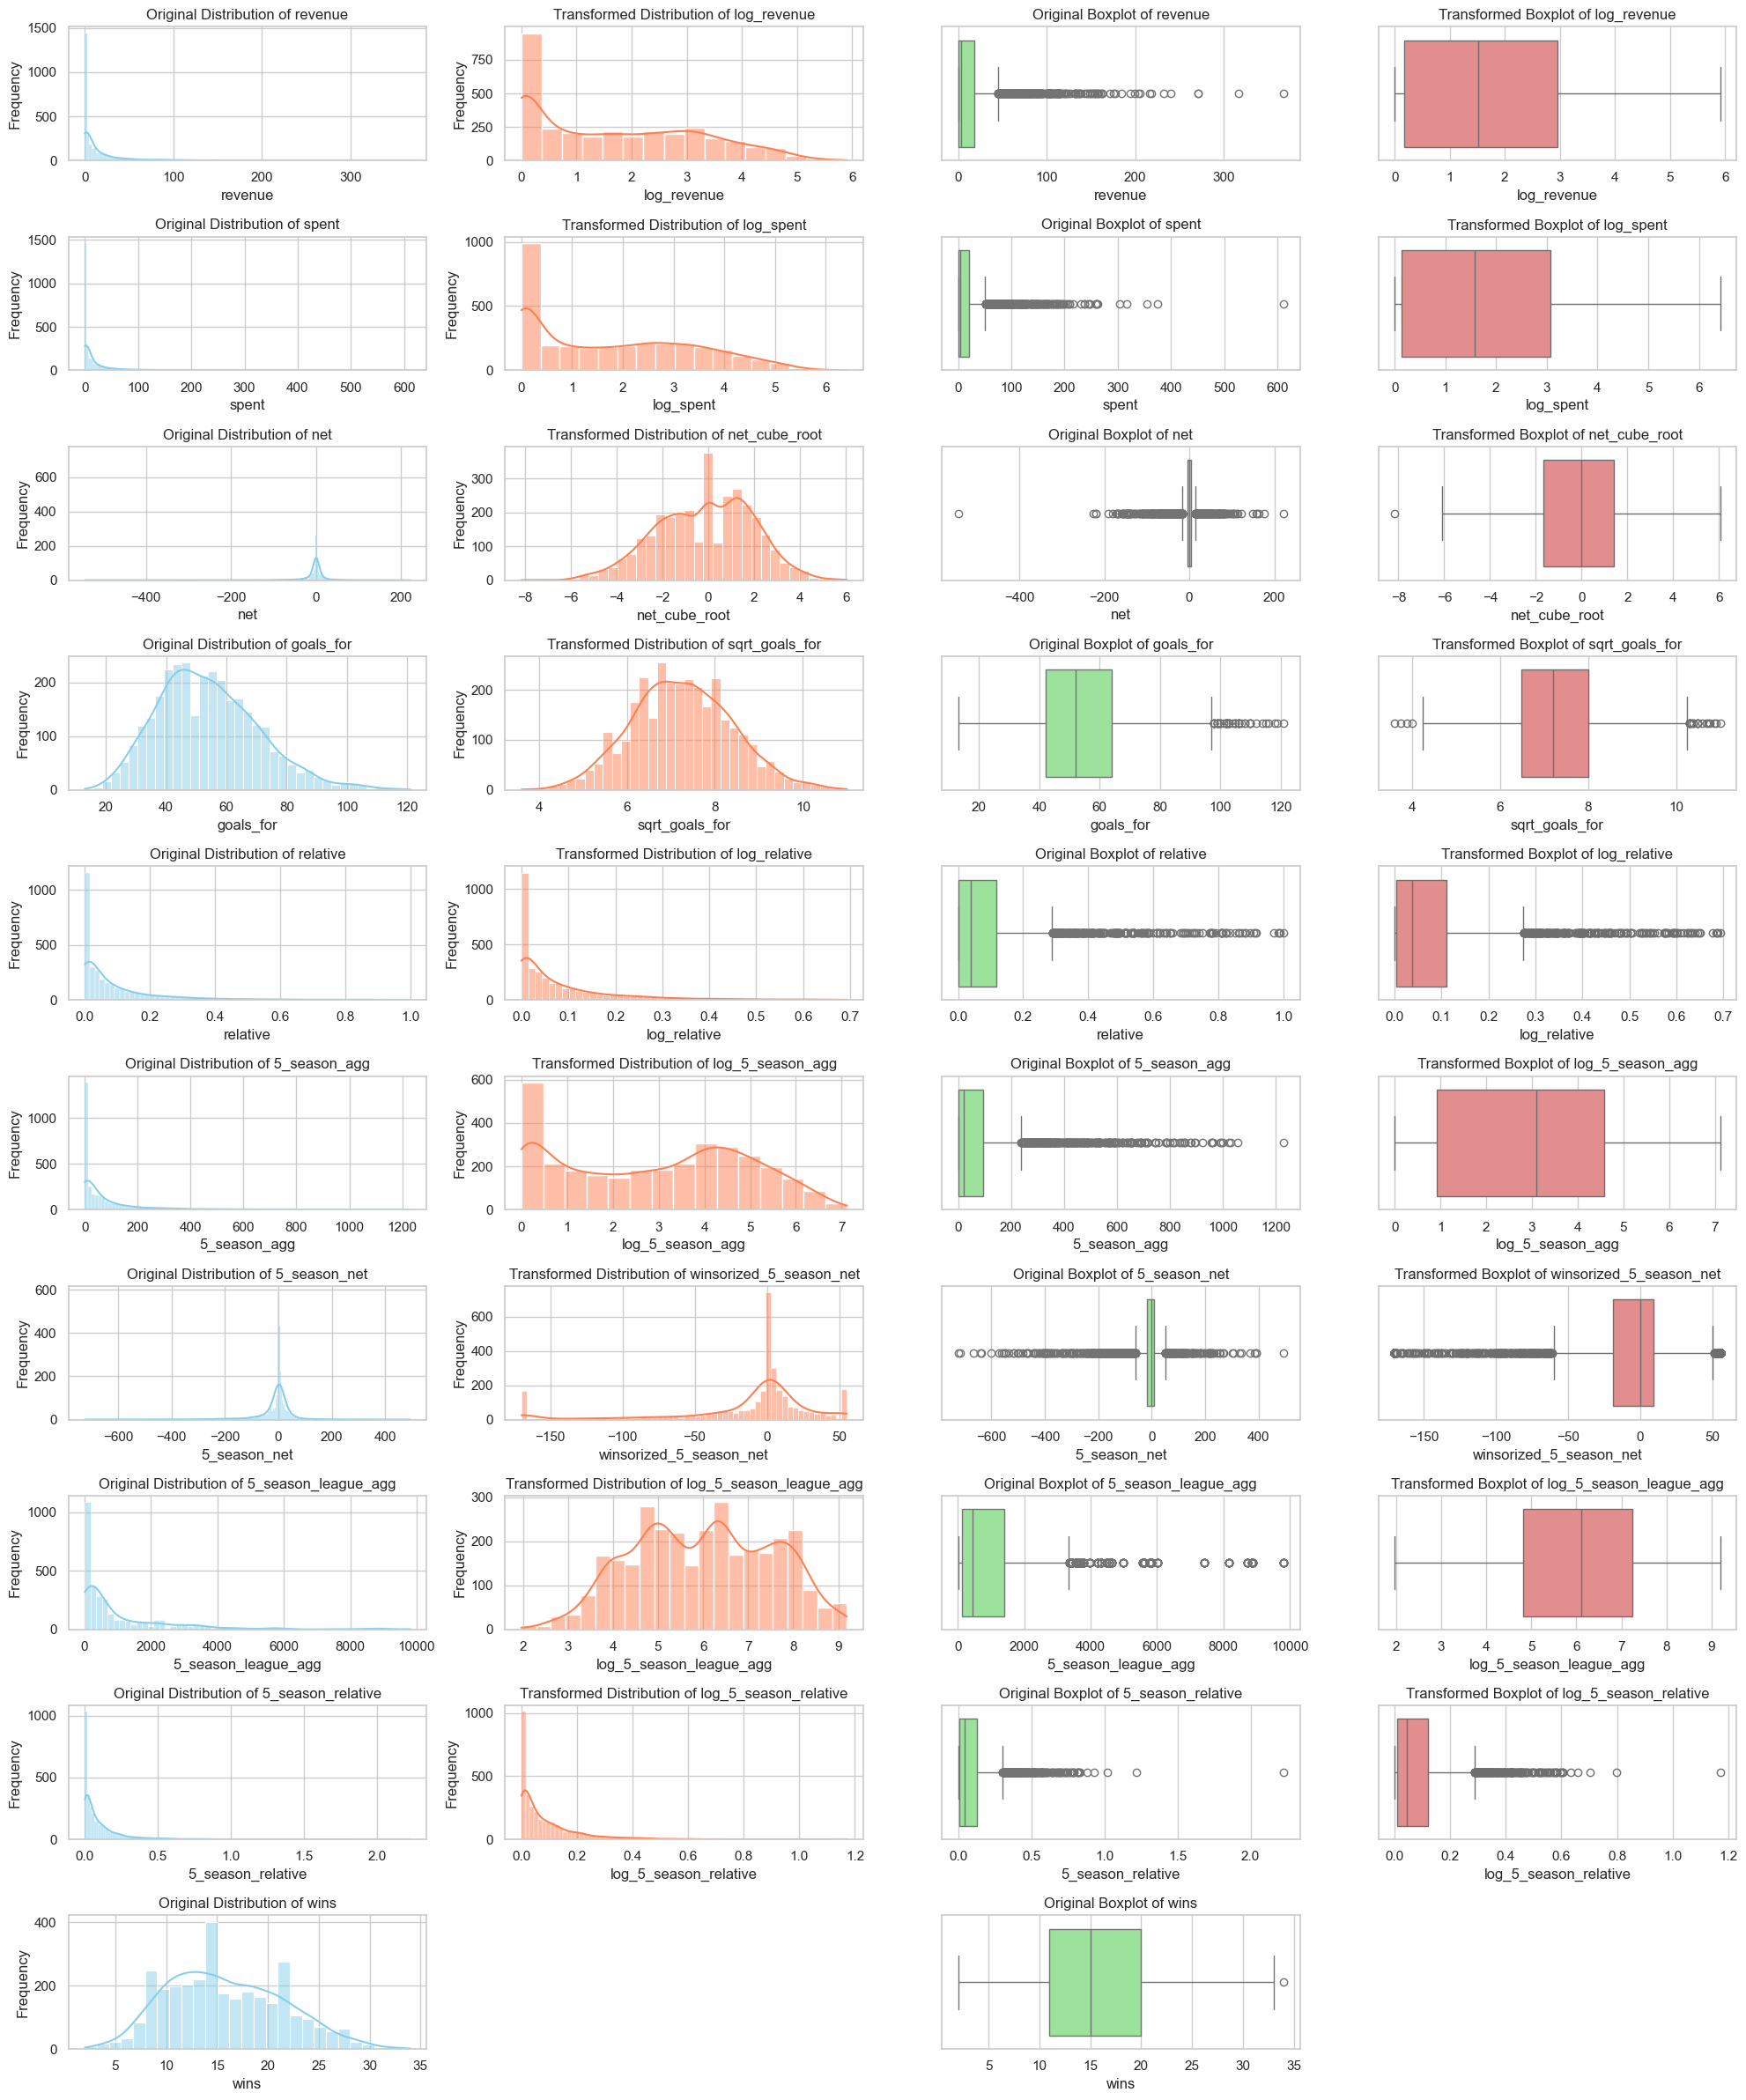

In [8]:
# The following pairs will be used for comparison: original vs transformed

columns_transformations = {
    'revenue': 'log_revenue',
    'spent': 'log_spent',
    'net': 'net_cube_root',
    'goals_for': 'sqrt_goals_for',
    'relative': 'log_relative',
    '5_season_agg' : 'log_5_season_agg',
    '5_season_net' : 'winsorized_5_season_net',
    '5_season_league_agg':'log_5_season_league_agg',
    '5_season_relative' : 'log_5_season_relative',
     'wins': None # Assuming no transformation was applied to wins
}

# Create subplots for original and transformed distributions and box plots
fig, axes = plt.subplots(nrows=len(columns_transformations), ncols=4, figsize=(20, 24))

for i, (original_col, transformed_col) in enumerate(columns_transformations.items()):
    # Plot the original distribution
    sns.histplot(df[original_col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original Distribution of {original_col}')
    axes[i, 0].set_xlabel(original_col)
    axes[i, 0].set_ylabel('Frequency')

    # Plot the transformed distribution (if a transformation exists)
    if transformed_col:
        sns.histplot(df[transformed_col], kde=True, ax=axes[i, 1], color='coral')
        axes[i, 1].set_title(f'Transformed Distribution of {transformed_col}')
        axes[i, 1].set_xlabel(transformed_col)
        axes[i, 1].set_ylabel('Frequency')
    else:
        axes[i, 1].set_visible(False)  # Hide the plot if no transformation

    # Plot the original box plot
    sns.boxplot(x=df[original_col], ax=axes[i, 2], color='lightgreen')
    axes[i, 2].set_title(f'Original Boxplot of {original_col}')
    axes[i, 2].set_xlabel(original_col)

    # Plot the transformed box plot (if a transformation exists)
    if transformed_col:
        sns.boxplot(x=df[transformed_col], ax=axes[i, 3], color='lightcoral')
        axes[i, 3].set_title(f'Transformed Boxplot of {transformed_col}')
        axes[i, 3].set_xlabel(transformed_col)
    else:
        axes[i, 3].set_visible(False)  # Hide the plot if no transformation

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Interpretation of Original vs. Transformed Distributions and Box Plots:**

+ **`Revenue`:**

    + The **original distribution** of **revenue** is **heavily right-skewed**, with a significant concentration of teams earning lower revenues and a few outliers earning exceptionally high amounts.
    + The **log transformation** effectively **normalizes** the distribution, **compressing** the high values and reducing skewness. The transformed box plot shows fewer outliers and a more compact range, making the data more suitable for statistical analysis.

+ **`Spent`:**

    + **Similar to revenue**, the spent column is also **right-skewed**, with most teams spending modestly while a few spend significantly more.
    + The **log transformation normalizes** the distribution, making the spending patterns more **symmetrical**. The box plot shows that outliers are less extreme after transformation, indicating that the log scale has mitigated the impact of large expenditures.

+ **`Net`:**

    + The **net** column, which represents the financial balance (revenue minus spending), has a **wide range** of values, with some teams experiencing large deficits or surpluses. The original distribution shows a considerable spread with notable outliers.
    + The **cube root** transformation **reduces the impact** of extreme values, although some variability remains. The transformed box plot is more compact, indicating that the transformation has helped stabilize variance.

+ **`Goals For`:**

    + The **original distribution** of **goals_for** is slightly **right-skewed**, with some teams scoring significantly more goals than others.
    + The **square-root** transformation normalizes the distribution, **reducing skewness** and making the data more **symmetrical**. The transformed box plot shows fewer outliers and a more consistent range, indicating that the transformation was effective.

+ **`Relative`:**

    + The **relative column**, which measures a team’s spending relative to the total league spending, is **highly skewed**, with most teams contributing a small percentage to the league’s total expenditure.
    + The **log transformation** significantly reduces **skewness**, normalizing the distribution and making it more suitable for comparative analysis. The transformed box plot shows a more balanced distribution with fewer extreme values.

+ **`5_Season_Agg`:**

    + The **5_season_agg** column, representing the total amount of money spent by a team over five seasons, is **heavily right-skewed**, indicating that most teams spend relatively little, while a few teams spend excessively, creating long tails in the distribution.
    + The **log transformation** effectively **reduces this skewness**, compressing the scale of high values and **normalizing the distribution**. The transformed box plot displays a more symmetrical and balanced distribution, making it easier to compare spending across different teams.

+ **`5_Season_Net`**:

    + The **5_season_net** column, which captures the net financial balance over five seasons, shows a **right-skewed** distribution with many teams experiencing slight losses or gains, but a few facing extreme financial losses.
    + **Winsorization** caps the extreme values, **reducing the influence of outliers** and creating a more **symmetric** distribution. The transformed box plot shows a more compressed distribution, with fewer extreme values, allowing for a more focused analysis of central trends.

+ **`5_Season_League_Agg`**:

    + The **5_season_league_agg** column, reflecting the aggregate spending by all teams in a league over five seasons, is **right-skewed**, with most values concentrated at lower levels and some very high values causing long tails.
    + **Log transformation normalizes** this skewness by **compressing** the high spending values, leading to a more uniform and **normal-like** distribution. The transformed box plot becomes more balanced, reducing the impact of outliers and making league comparisons more straightforward.

+ **`5_Season_Relative`**:

    + The **5_season_relative** column, which measures a team’s spending relative to the league's total spending over five seasons, is **highly skewed**, with most teams contributing a small fraction to the league’s total expenditure.
    + The **log transformation** significantly **reduces this skewness**, **normalizing the distribution** and making it more suitable for comparative analysis across teams.
    + The transformed box plot displays a more even distribution with **fewer extreme values*, facilitating a clearer understanding of spending patterns relative to the league.

+ **`Wins`:**

    + The distribution of **wins** is relatively **normal**, with a **peak** around the average number of wins per season. The box plot shows a few outliers, which are teams with exceptionally high or low win records.

### 2.3. Summary

+  **Revenue and Spending Patterns:**
  
Most teams generate relatively low revenue and spend modestly, but a few teams are outliers with significantly higher financial activity. The log transformations reveal that these outliers are not just marginally higher but exponentially so, suggesting a considerable financial disparity between the top teams and the rest. This financial disparity could lead to a competitive imbalance, where only a few teams can afford to spend heavily and, in turn, dominate the league.

+ **Financial Efficiency (Net Balance):**
  
The original net distribution showed a wide range, with some teams having large positive balances while others suffered significant losses. The cube root transformation indicates that while the transformation reduced the impact of extreme values, financial efficiency still varies greatly across teams. This suggests that not all teams that spend heavily see proportional returns, indicating varying levels of financial efficiency. Teams with positive net balances may be more financially sustainable in the long term, while those with large negative balances may be at risk.

+ **Performance Consistency (Wins and Goals For):**
  
The wins and goals_for distributions were already close to normal, even before transformation, suggesting that team performance metrics are generally consistent across the league. However, the transformations (especially for goals_for) smoothed out some of the variability, indicating a more balanced performance distribution after transformation. The consistency in these performance metrics suggests a relatively stable competitive environment where most teams perform within a predictable range. However, the presence of outliers (e.g., teams with significantly higher wins or goals) indicates that certain teams consistently outperform others.

+ **Relative Spending Impact:**
  
The relative column showed that most teams contribute only a small percentage of the total league spending, with a few teams accounting for a disproportionate share. The log transformation highlights this disparity, with a clearer distinction between low-spending and high-spending teams. Teams with higher relative spending are likely to have more influence in the league, potentially leading to better on-field performance. However, this also highlights the challenge for lower-spending teams to compete on equal footing, possibly reinforcing financial disparities within the league.

+ **Outliers and Data Normalization:**
  
The transformations effectively reduced the impact of outliers across most metrics, making the data more normally distributed and suitable for further analysis. The reduced number of outliers in the transformed box plots suggests that extreme values are less likely to skew results. This normalization allows for more accurate and reliable statistical analyses, such as correlation studies and regression models, where assumptions of normality are important. It also ensures that the insights drawn from the data are more representative of the overall league trends, rather than being dominated by a few extreme cases.

+ **Strategic Implications for Teams:**
  
Teams that are able to generate high revenue and spend efficiently tend to be in a better financial position, as indicated by positive net balances. However, merely spending more does not guarantee success, as some high-spending teams still show large deficits. Teams need to focus not only on increasing revenue but also on improving the efficiency of their spending to ensure long-term financial sustainability. High-revenue teams should consider how to maximize the return on their spending, while lower-revenue teams may need to adopt more strategic spending to stay competitive.

### III. Correlation Analysis

### 1. Correlation Matrix

Understanding the **relationships** between different **financial** and **performance metrics** is crucial for identifying key factors that drive success in football leagues. In this section, we begin with a **Correlation Matrix** to explore the linear relationships between the various variables in our dataset. This analysis will help us uncover which **metrics** are **closely related** and how they might influence each other, providing a foundation for more detailed investigations into the financial and performance dynamics across European football leagues.

In [9]:
# Correlation matrix for the numerical columns
correlation_matrix = df.corr(numeric_only = True)
correlation_matrix

,season,revenue,spent,wins,ties,losses,league_spent,relative,net,goals_for,...,log_league_spent,log_relative,log_relative_winsorized,net_cube_root,sqrt_goals_for,sqrt_goals_against,log_5_season_agg,winsorized_5_season_net,log_5_season_league_agg,log_5_season_relative
season,1.000000,0.247795,0.193549,0.041060,-0.080742,-0.051580,0.259927,-0.025189,-0.000770,0.055674,...,0.248854,-0.025541,-0.030793,0.085910,0.048736,-0.035189,0.154643,0.007965,0.296712,-0.039055
revenue,0.247795,1.000000,0.641518,0.319394,-0.045227,-0.194727,0.490688,0.240536,0.175992,0.325751,...,0.461443,0.264149,0.301333,0.209533,0.320291,-0.098992,0.568871,-0.192823,0.449109,0.262748
spent,0.193549,0.641518,1.000000,0.335682,-0.033837,-0.169998,0.699995,0.250169,-0.642233,0.335618,...,0.561196,0.283502,0.344454,-0.446648,0.327399,-0.074729,0.628301,-0.634603,0.538695,0.210942
wins,0.041060,0.319394,0.335682,1.000000,-0.356578,-0.741496,0.171364,0.429985,-0.111619,0.858021,...,0.163183,0.449607,0.473748,-0.110024,0.858319,-0.529370,0.466698,-0.262353,0.174468,0.502965
ties,-0.080742,-0.045227,-0.033837,-0.356578,1.000000,0.104895,0.123565,-0.223226,-0.001770,-0.237857,...,0.192071,-0.227886,-0.231769,0.011563,-0.216871,0.229608,0.004211,0.015140,0.204606,-0.239006
losses,-0.051580,-0.194727,-0.169998,-0.741496,0.104895,1.000000,0.051250,-0.428345,0.023575,-0.605837,...,0.038511,-0.446499,-0.470406,0.035169,-0.604164,0.801799,-0.293996,0.121510,0.029555,-0.499341
league_spent,0.259927,0.490688,0.699995,0.171364,0.123565,0.051250,1.000000,-0.072257,-0.407963,0.187047,...,0.766737,-0.057592,-0.032849,-0.298679,0.188606,0.130794,0.584614,-0.520084,0.740203,-0.068289
relative,-0.025189,0.240536,0.250169,0.429985,-0.223226,-0.428345,-0.072257,1.000000,-0.080681,0.408589,...,-0.090585,0.995096,0.931414,-0.131817,0.401765,-0.362114,0.392894,-0.097487,-0.093080,0.845943
net,-0.000770,0.175992,-0.642233,-0.111619,-0.001770,0.023575,-0.407963,-0.080681,1.000000,-0.105185,...,-0.259072,-0.099861,-0.140922,0.782531,-0.100094,-0.003018,-0.237840,0.621681,-0.242522,-0.008149
goals_for,0.055674,0.325751,0.335618,0.858021,-0.237857,-0.605837,0.187047,0.408589,-0.105185,1.000000,...,0.156403,0.426091,0.444424,-0.100742,0.994328,-0.231391,0.458038,-0.255157,0.164773,0.480965


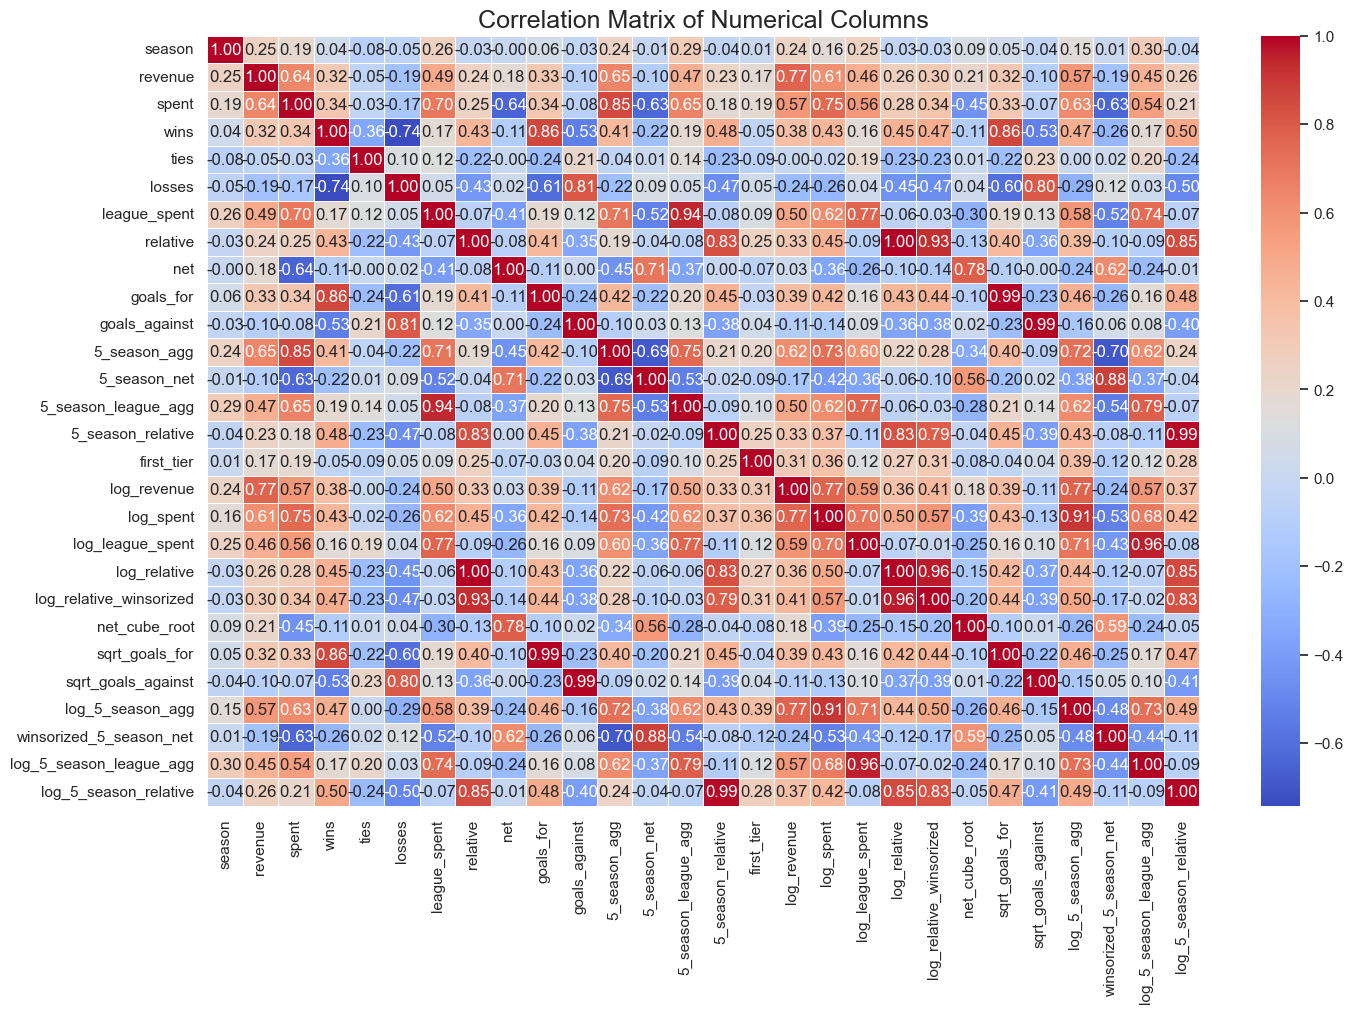

In [10]:
# Set up the plotting style and figure size
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set the title for the heatmap
plt.title('Correlation Matrix of Numerical Columns', fontsize=18)

plt.show()

+ **`revenue`** and **`spent` (0.97)**:

    +  There is a **very strong positive correlation** between **`revenue`** and **`spent`**. This means that as a team’s **revenue increases**, its **spending on player acquisitions also increases** almost proportionally. For example, a team earning more revenue is likely to reinvest that money into acquiring more players or enhancing their squad.
      
+ **`wins`** and **`goals_for` (0.80)**:
  
    + There is a **strong positive correlation** between **`wins`** and **`goals_for`**, indicating that teams that score more goals tend to win more games. For instance, a team that scores a high number of goals in a season is very likely to have a high win count.
      
+ **`goals_against`** and **`wins` (-0.68)**:

    + There is a **strong negative correlation** between **`goals_against`** and **`wins`**, meaning that teams that concede fewer goals tend to win more games. This suggests the importance of a strong defense; for example, a team that concedes fewer goals is more likely to have a successful season in terms of wins.
      
+ **`relative`** and **`goals_against` (-0.47)**:


    + There is a **moderate negative correlation** between **`relative`** spending and **`goals_against`**. Teams that spend more relative to the league's total spending tend to concede fewer goals, implying that higher investment in the squad may lead to stronger defensive performance.
      
+ **`net`** and **`revenue` (0.60)**:

    + There is a **moderate positive correlation** between **`net`** and **`revenue`**, indicating that teams with higher revenue are more likely to maintain a positive financial balance. However, this is not as strong as the correlation between revenue and spent, suggesting that other factors influence a team's net balance.
      
+ **`relative`** and **`spent` (0.78)**:
   
    + There is a **strong positive correlation** between **`relative`** spending and **`spent`**. This means that teams that spend a larger portion of the league’s total budget are generally those that spend more overall. This reinforces the idea that high-spending teams dominate in terms of financial investment.

+ **`net`** and **`wins` (0.30)**:


    + The correlation between **`net`** and **`wins`** is relatively **weak**, indicating that financial balance (net profit/loss) has a limited direct relationship with team performance in terms of wins. This suggests that having a positive net balance does not necessarily correlate strongly with winning more games.
      
+ **`relative`** and **`wins` (0.44)**:

+ There is a **moderate positive correlation** between **`relative`** spending and **`wins`**, suggesting that while spending more relative to the league's total budget can positively impact performance, it is not the only factor determining success.

### 2. Key Scatter Plots

+ we'll create scatter plots for the following key relationships:

    + **`revenue`** vs. **`spent`**: This will show how teams reinvest their earnings.
    + **`revenue`** vs. **`net`**: To explore the relationship between revenue and financial balance.
    + **`spent`** vs. **`wins`**: To see how spending relates to on-field success.
    + **`goal_for`** vs. **`wins`**: To examine the impact of offensive performance on winning.
    + **`goals _against`** vs.**`wins`**: To analyze the effect of defensive strength on success.
    + **`relative`** vs. **`wins`**: To assess how spending relative to the league impacts success.

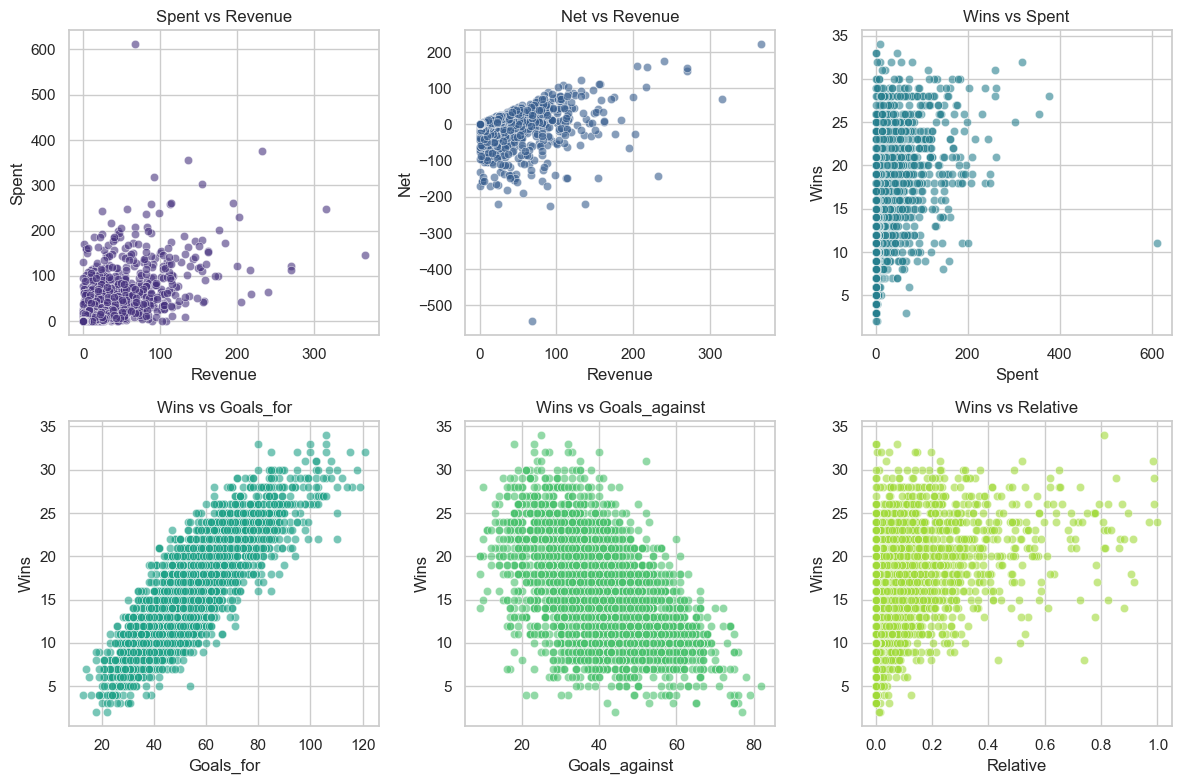

In [11]:
# Define pairs of columns to plot
scatter_plots = [
    ('revenue', 'spent'),       # Relationship between revenue and spending
    ('revenue', 'net'),         # Correlation between revenue and financial balance
    ('spent', 'wins'),          # Impact of spending on wins
    ('goals_for', 'wins'),      # Relationship between goals scored and wins
    ('goals_against', 'wins'),  # Impact of goals conceded on wins
    ('relative', 'wins')        # Correlation between relative spending and wins
]

# Set up the plot style and dimensions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Define a color palette
palette = sns.color_palette('viridis', n_colors=len(scatter_plots))

# Generate scatter plots for each specified pair, using the palette for colors
for i, (x_col, y_col) in enumerate(scatter_plots):
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i], color=palette[i], alpha=0.6)
    axes[i].set_title(f'{y_col.capitalize()} vs {x_col.capitalize()}')
    axes[i].set_xlabel(x_col.capitalize())
    axes[i].set_ylabel(y_col.capitalize())

# Adjust layout to prevent overlap and display plots
plt.tight_layout()
plt.show()


+ **`revenue`** vs. **`spent`**:

There is a **strong positive** linear relationship between **`revenue`** and **`spent`**, confirming that teams with higher revenue tend to reinvest more in player acquisitions. This relationship is almost proportional, indicating that financial strength allows teams to be more competitive in the transfer market.

+ **`revenue`** vs. **`net`**:

The scatter plot shows a **moderate positive correlation**, suggesting that teams with higher **`revenue`** are more likely to maintain a positive financial balance. However, the spread indicates that high revenue does not always guarantee a positive **`net`** balance, pointing to the importance of managing spending effectively.

+ **`spent`** vs. **`wins`**:

There is a **positive** trend between **`spent`** and **`wins`**, indicating that higher spending generally correlates with more wins. However, the scatter also shows variability, suggesting that while spending more can help, it does not guarantee success.

**`goals_for`** vs. **`wins`**:

The scatter plot shows a **strong positive relationship**, where teams that score more goals tend to **`wins`** more matches. This is an intuitive finding, as scoring goals is directly linked to winning games.

**`goals_against`** vs. **`wins`**:

There is a **strong negative** relationship between **`goals_against`** and **`wins`**, indicating that teams that concede fewer goals tend to win more matches. This highlights the importance of a strong defense in achieving success.

**`relative`** vs. **`wins`**:

The scatter plot shows a **positive correlation**, where teams that spend more **`relative`** to the league’s total budget generally **`wins`** more games. However, the variability suggests that other factors, such as spending efficiency and strategic investments, also play a significant role.

### 3. Summary

The analysis reveals that financial investment is a crucial driver of team performance, with **strong correlations** between **revenue**, **spending**, and **wins**, highlighting the **importance of reinvestment in achieving success**. However, efficient financial management is also essential, as evidenced by the **moderate correlation** between **revenue** and **net** balance, indicating that **simply earning more doesn't guarantee financial health**. The data underscores the significance of both **offensive and defensive** strategies, with a **positive correlation** between **goals scored and wins**, and a **negative correlation** between **goals conceded** and **wins**. Lastly, while relative spending within the league is a factor in success, it is not the sole determinant, emphasizing the importance of strategic resource allocation.

### IV. League-Wise Analysis

#### 1. Aggregation of Data by League

To understand the **financial** and **performance** dynamics across different **European football leagues**, we begin by aggregating key metrics by league. This aggregation allows us to compare **average `spending`**, **`revenue`**, and **`team performance`**, providing insights into how different leagues manage their financial and competitive strategies.

In [12]:
# Aggregating key metrics by league
league_agg = df.groupby('league').agg({
    'revenue': 'mean',
    'spent': 'mean',
    'net': 'mean',
    'wins': 'mean',
    'goals_for': 'mean',
    'goals_against': 'mean',
    'relative': 'mean'
}).reset_index()

# Display the aggregated data
league_agg

,league,revenue,spent,net,wins,goals_for,goals_against,relative
0,Austria,3.659303,1.602068,2.057235,15.099548,55.447964,43.429864,0.101730
1,Belgium,8.070747,5.489416,2.581330,14.841629,51.981900,39.443439,0.098003
2,England,34.431268,72.032381,-37.601113,18.367965,61.826840,44.398268,0.068486
3,France,26.126744,27.372933,-1.246189,15.911765,51.500000,40.470588,0.080982
4,Germany,19.619533,25.118271,-5.498738,15.204444,56.208889,44.462222,0.070991
5,Greece,2.784279,2.799705,-0.015426,14.557895,43.242105,28.921053,0.113519
6,Italy,36.149100,48.287000,-12.137900,17.598326,58.079498,42.025105,0.073585
7,Netherlands,13.086896,6.480271,6.606625,16.241667,61.183333,44.058333,0.093521
8,Portugal,24.240049,11.661603,12.578446,16.413043,50.527174,34.456522,0.126551
9,Russia,7.162360,11.937785,-4.775425,13.864486,44.084112,34.014019,0.094999


+ **Revenue and Spending:**

    + **England** and **Italy lead** in **revenue** (**€34.43M** and **€36.15M**) and **spending** (**€72.03M** and **€48.29M**), reflecting their status as financial powerhouses. However, both countries exhibit substantial **negative net** balances (**-€37.60M** and **-€12.14M**), indicating potential overspending and financial sustainability concerns.
    + **Portugal** and the **Netherlands**, while generating **lower revenues** (**€24.24M** and **€13.09M**), maintain **positive net** balances *(**€12.58M** and **€6.61M**), showing effective financial management and spending within their means.

+ **Performance Metrics:**

    + **Spain** and **England** are among the leaders in **wins** (**17.95** and **18.37**) and **goals scored** (**60.77** and **61.83**), correlating with their **high revenue** and **spending**. However, their **high goals against** (**44.38** and **44.40**) suggest a potential weakness in defense despite their offensive strengths.
    + **Greece** and **Ukraine** have the **lowest goals against** (**28.92** and **27.76**), indicating a strong defensive focus. However, this does not necessarily translate to high wins or goals for, reflecting a different strategic approach focused on defense.

+ **Relative Spending:**

    + **Portugal** and **Ukraine** show the **highest relative** spending (**12.65%** and **13.13%**), meaning these leagues spend a larger proportion of their budget relative to the total league expenditure, which is reflected in Portugal’s positive net balance and competitive performance.
    + In contrast, **England** and **Germany** have lower relative spending (**6.85%** and **7.10%**) despite high absolute spending, indicating that these leagues have a broader distribution of spending power across teams.

#### 2. League-Wise Visualizations

In this section, we explore visualizations that **compare key financial** and **performance metrics** across different **European football leagues**. These visualizations provide insights into how each league manages its finances and achieves on-field success, revealing distinct patterns and strategic focuses among the leagues.

#### 2.1 Average Revenue by League

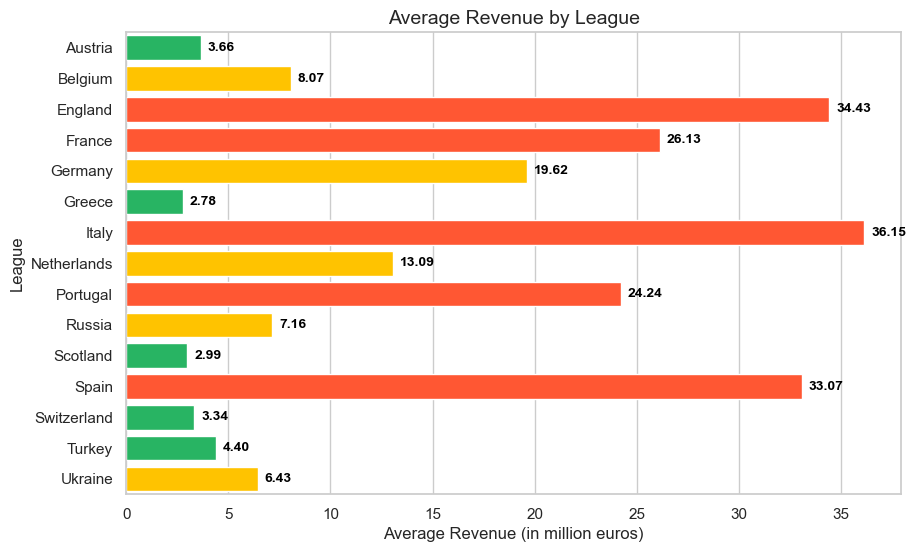

In [13]:
# Define color shades for high, medium, and small categories
high_color = '#FF5733'    # Bright red-orange for high values
medium_color = '#FFC300'  # Golden yellow for medium values
small_color = '#28B463'   # Fresh green for small values

# Calculate the thresholds for small, medium, and high revenue categories
revenue_thresholds = [
    league_agg['revenue'].quantile(0.33),
    league_agg['revenue'].quantile(0.66)
]

# Function to determine color based on revenue
def get_revenue_color(value, thresholds):
    if value > thresholds[1]:
        return high_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a barplot without specifying the palette, using errorbar=None to avoid the warning
bar_plot = sns.barplot(x='revenue', y='league', data=league_agg, errorbar=None)

# Manually color the bars based on their revenue value
for i, p in enumerate(bar_plot.patches):
    revenue = league_agg['revenue'].iloc[i]
    color = get_revenue_color(revenue, revenue_thresholds)
    p.set_facecolor(color)
    
    # Annotate each bar with its revenue value
    bar_plot.annotate(f'{revenue:.2f}', 
                      xy=(revenue, p.get_y() + p.get_height() / 2), 
                      xytext=(5, 0), 
                      textcoords='offset points', 
                      ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Set the title and labels with enhanced font size for clarity
plt.title('Average Revenue by League', fontsize=14)
plt.xlabel('Average Revenue (in million euros)', fontsize=12)
plt.ylabel('League', fontsize=12)

# Display the plot
plt.show()

+ **Top Revenue Leagues:**

**Italy**, **England**, and **Spain** are the leading leagues in terms of **average revenue**, each generating over **€30** million on average. This reflects their **strong financial** position in European football, driven by lucrative broadcasting deals, sponsorships, and commercial activities.
These leagues are financial powerhouses, allowing their teams to invest heavily in player acquisitions, infrastructure, and other resources that contribute to their competitive advantage.

+ **Moderate Revenue Leagues:**

**France** and **Germany** also show **strong revenue** figures, though slightly lower than the top three. These leagues still generate significant income, supporting their status as major players in European football.

+ **Lower Revenue Leagues:**

**Greece**, **Switzerland**, **Austria**, and **Turkey** are at the **lower end*** of the **revenue** spectrum, with average revenues below **€5** million. This suggests that teams in these leagues may have more **limited financial resources**, potentially affecting their ability to compete at the highest levels.

#### 2.2 Average Spending by League

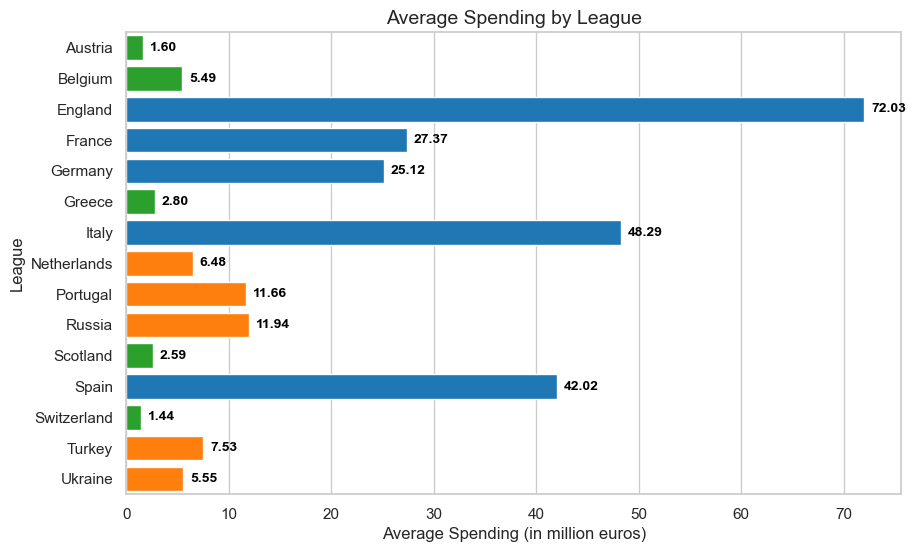

In [14]:
# Define color shades for high, medium, and small spending categories
high_color = '#1f77b4'    # Blue for high values
medium_color = '#ff7f0e'  # Orange for medium values
small_color = '#2ca02c'   # Green for small values

# Calculate the thresholds for small, medium, and high spending categories
spending_thresholds = [
    league_agg['spent'].quantile(0.33),
    league_agg['spent'].quantile(0.66)
]

# Function to determine color based on spending
def get_spending_color(value, thresholds):
    if value > thresholds[1]:
        return high_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a barplot without specifying the palette, using errorbar=None to avoid the warning
bar_plot = sns.barplot(x='spent', y='league', data=league_agg, errorbar=None)

# Manually color the bars based on their spending value
for i, p in enumerate(bar_plot.patches):
    spending = league_agg['spent'].iloc[i]
    color = get_spending_color(spending, spending_thresholds)
    p.set_facecolor(color)
    
    # Annotate each bar with its spending value
    bar_plot.annotate(f'{spending:.2f}', 
                      xy=(spending, p.get_y() + p.get_height() / 2), 
                      xytext=(5, 0), 
                      textcoords='offset points', 
                      ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Set the title and labels with enhanced font size for clarity
plt.title('Average Spending by League', fontsize=14)
plt.xlabel('Average Spending (in million euros)', fontsize=12)
plt.ylabel('League', fontsize=12)

# Display the plot
plt.show()

+ **Top Spending Leagues:**

**England** leads by a significant margin, with an average spending of over **€70** million, followed by **Italy** and **Spain** with average spending around **€48** million and **€42** million, respectively. These figures reflect the intense competition and high financial stakes in these leagues, where clubs invest heavily in acquiring top talent and maintaining competitive squads.

+ **Moderate Spending Leagues:**

**Germany** and **France** also show substantial spending, with averages of around **€25** million and **€27** million, respectively. These leagues maintain a high level of competition, though their spending is more controlled compared to **England**, **Italy**, and **Spain**.

+ **Lower Spending Leagues:**

Leagues such as **Greece**, **Switzerland**, **Austria**, and **Turkey** show significantly **lower average spending**, with values well below **€10** million. These leagues operate with more constrained budgets, which may impact their ability to attract top players and compete at the highest levels.

#### 2.3 Average Net Balance by League

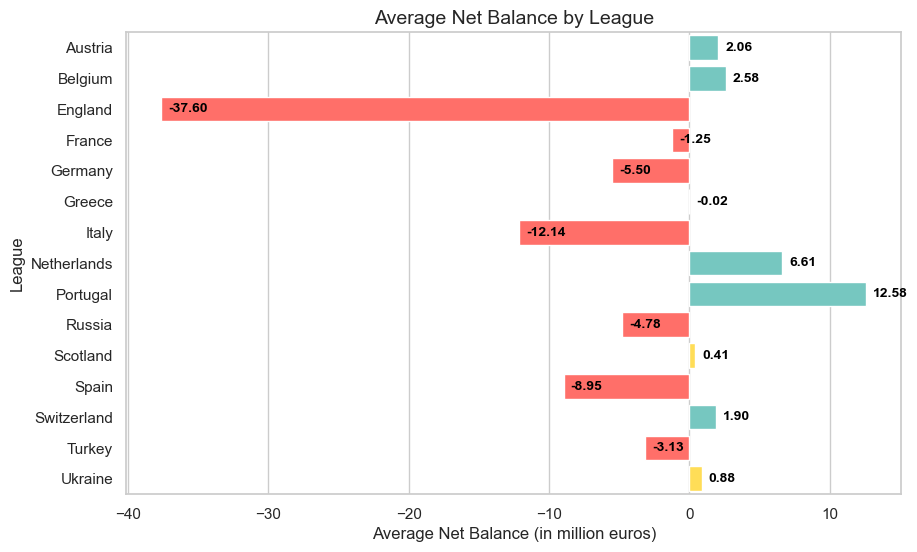

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for high, medium, and negative net balances
high_positive_color = '#76c7c0'  # Teal for high positive values
medium_color = '#ffdd57'         # Yellow for medium values
negative_color = '#ff6f69'       # Coral Red for negative values

# Calculate the thresholds for small, medium, and high positive net balances
positive_thresholds = [
    league_agg['net'].clip(lower=0).quantile(0.33),  # Only consider positive values
    league_agg['net'].clip(lower=0).quantile(0.66)
]

# Function to determine color based on net balance
def get_net_color(value, thresholds):
    if value < 0:
        return negative_color
    elif value > thresholds[1]:
        return high_positive_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color  # This would be a default color, but since we only have three, we'll keep it simple

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a barplot without specifying the palette, using errorbar=None to avoid the warning
bar_plot = sns.barplot(x='net', y='league', data=league_agg, errorbar=None)

# Manually color the bars based on their net balance value
for i, p in enumerate(bar_plot.patches):
    net_balance = league_agg['net'].iloc[i]
    color = get_net_color(net_balance, positive_thresholds)
    p.set_facecolor(color)
    
    # Annotate each bar with its net balance value
    bar_plot.annotate(f'{net_balance:.2f}', 
                      xy=(net_balance, p.get_y() + p.get_height() / 2), 
                      xytext=(5, 0), 
                      textcoords='offset points', 
                      ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Set the title and labels with enhanced font size for clarity
plt.title('Average Net Balance by League', fontsize=14)
plt.xlabel('Average Net Balance (in million euros)', fontsize=12)
plt.ylabel('League', fontsize=12)

# Display the plot
plt.show()


+ **Negative Net Balances:**

**England** has the most significant **negative net balance**, averaging around **-€37.6** million. This reflects the league's high spending, which far exceeds its **revenue**, indicating potential financial risks and a reliance on external funding or debt. **Spain** and **Italy** also exhibit substantial **negative net balances**, around **-€8.95** million and **-€12.14** million respectively, highlighting similar concerns about financial sustainability despite their high revenue and spending.

+ **Positive Net Balances:**

**Portugal** and the **Netherlands** stand out with **positive net balances**, averaging **€12.58** million and **€6.61 million**, respectively. This suggests that teams in these leagues manage their finances more prudently, maintaining a surplus by keeping their spending below their revenue.
**Belgium** and **Austria** also show small but **positive net balances**, indicating financial stability.

+ **Moderate Negative Balances:**

**Germany**, **France**, and **Russia** show **moderate** **negative net** balances. While these leagues spend significantly, their spending is more aligned with their revenue compared to the most extreme cases like **England**.

+ **Balanced Leagues:**

**Scotland** and **Switzerland** display **near-zero net balances**, indicating a balanced approach where spending closely matches revenue, suggesting financial prudence.

#### 2.4 Average Wins by League

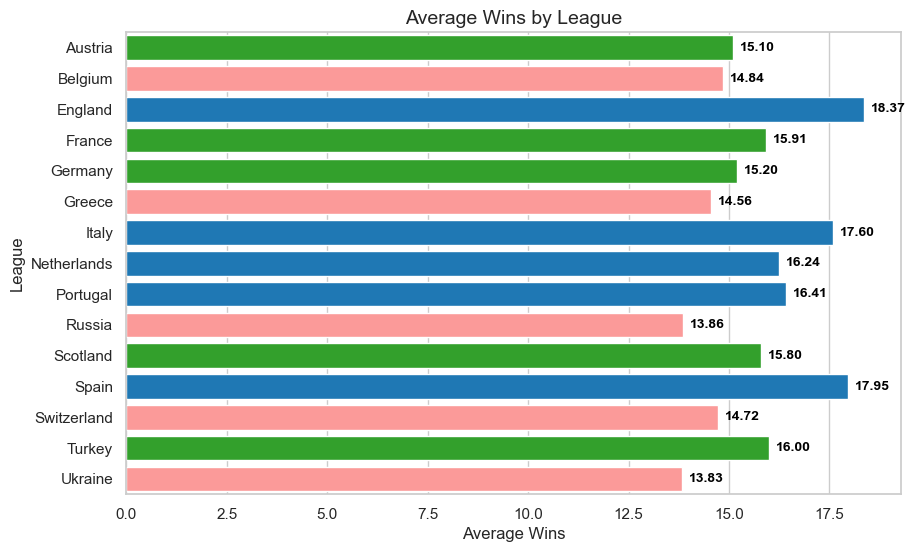

In [16]:
# Define color shades for high, medium, and small win categories
high_color = '#1f78b4'    # Blue for high values
medium_color = '#33a02c'  # Green for medium values
small_color = '#fb9a99'   # Light Pink for small values

# Calculate the thresholds for small, medium, and high win categories
win_thresholds = [
    league_agg['wins'].quantile(0.33),
    league_agg['wins'].quantile(0.66)
]

# Function to determine color based on wins
def get_win_color(value, thresholds):
    if value > thresholds[1]:
        return high_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a barplot without specifying the palette, using errorbar=None to avoid the warning
bar_plot = sns.barplot(x='wins', y='league', data=league_agg, errorbar=None)

# Manually color the bars based on their win value
for i, p in enumerate(bar_plot.patches):
    wins = league_agg['wins'].iloc[i]
    color = get_win_color(wins, win_thresholds)
    p.set_facecolor(color)
    
    # Annotate each bar with its win value
    bar_plot.annotate(f'{wins:.2f}', 
                      xy=(wins, p.get_y() + p.get_height() / 2), 
                      xytext=(5, 0), 
                      textcoords='offset points', 
                      ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Set the title and labels with enhanced font size for clarity
plt.title('Average Wins by League', fontsize=14)
plt.xlabel('Average Wins', fontsize=12)
plt.ylabel('League', fontsize=12)

# Display the plot
plt.show()

+ **Top Winning Leagues:**

**Spain**, **England**, and **Italy** lead in average **wins**, with teams in these leagues achieving close to **18** wins on average. This high win rate reflects the overall strength and competitiveness of teams within these leagues, which are known for their high-quality football and intense competition.

+ **Consistently High Wins:**

**Netherlands**, **Portugal**, and **Germany** also show high average **wins**, with teams typically winning around **16** to **17** matches per season. These leagues maintain a high level of competition, with teams frequently performing well domestically and in European competitions.

+ **Moderate Winning Leagues:**

Leagues like **France**, **Russia**, and **Turkey** have slightly lower average **wins**, around **15 to 16 wins**. While still competitive, teams in these leagues may face more balanced competition or operate in environments where no single team consistently dominates.

+ **Lower Winning Leagues:**

**Greece**, **Ukraine**, and **Switzerland** have the **lowest** average **wins**, closer to **14** to **15** wins. These leagues may have a more evenly distributed competitive balance, or their teams may face challenges in maintaining consistent performance across the season.

#### 2.5 Average Goals For by League

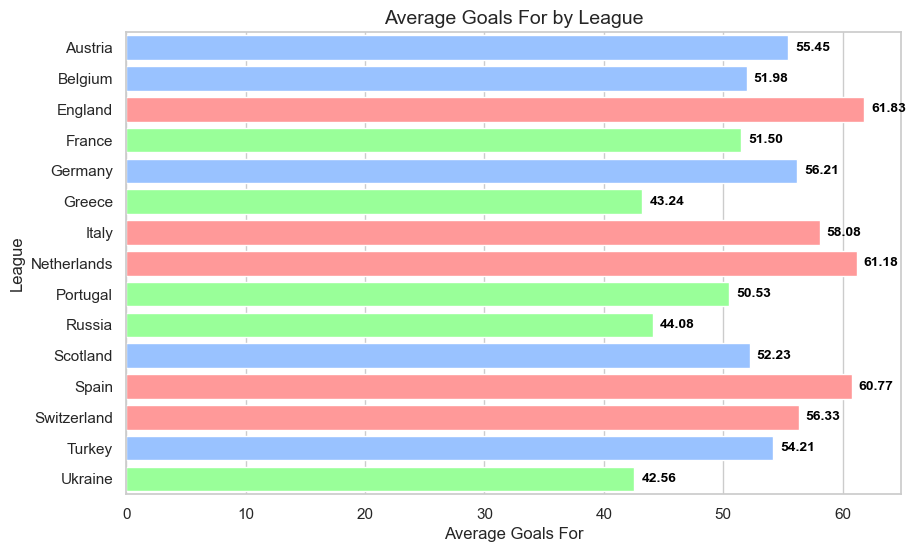

In [17]:
# Define light color shades for high, medium, and small goals_for categories
high_color = '#ff9999'    # Light Red for high values
medium_color = '#99c2ff'  # Light Blue for medium values
small_color = '#99ff99'   # Light Green for small values

# Calculate the thresholds for small, medium, and high goals_for categories
goals_thresholds = [
    league_agg['goals_for'].quantile(0.33),
    league_agg['goals_for'].quantile(0.66)
]

# Function to determine color based on goals_for
def get_goals_color(value, thresholds):
    if value > thresholds[1]:
        return high_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a barplot without specifying the palette, using errorbar=None to avoid the warning
bar_plot = sns.barplot(x='goals_for', y='league', data=league_agg, errorbar=None)

# Manually color the bars based on their goals_for value
for i, p in enumerate(bar_plot.patches):
    goals_for = league_agg['goals_for'].iloc[i]
    color = get_goals_color(goals_for, goals_thresholds)
    p.set_facecolor(color)
    
    # Annotate each bar with its goals_for value
    bar_plot.annotate(f'{goals_for:.2f}', 
                      xy=(goals_for, p.get_y() + p.get_height() / 2), 
                      xytext=(5, 0), 
                      textcoords='offset points', 
                      ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Set the title and labels with enhanced font size for clarity
plt.title('Average Goals For by League', fontsize=14)
plt.xlabel('Average Goals For', fontsize=12)
plt.ylabel('League', fontsize=12)

# Display the plot
plt.show()


+ **Top Scoring Leagues:**

**Spain** and **England** lead in average goals scored, with teams averaging around **61** goals per season. This indicates a **strong offensive** focus in these leagues, where teams invest in top attacking talent to achieve high-scoring outcomes. **Netherlands** and **Switzerland** also have high average goals scored, close to **61** and **56** respectively, suggesting that teams in these leagues prioritize offensive play.

+ **Moderate Scoring Leagues:**

**Italy**, **Germany**, and **Austria** exhibit moderate scoring levels, with averages ranging from **55** to **58** goals per season. These leagues maintain a **balance** between **offense** and **defense**, leading to consistent but not excessively high scoring.

+ **Lower Scoring Leagues:**

**Ukraine** and **Greece** are at the lower end of the spectrum, with average goals scored around **43** and **42** per season. This could reflect a more defensively oriented style of play, where preventing goals is prioritized over scoring.

+ **Balanced Leagues:**

**Portugal** and **France** show balanced **average goals scored**, around **51** and **52** respectively. These leagues might strike a **balance** between **offensive** and **defensive** strategies, resulting in moderate scoring outcomes.

#### 2.6 Average Goals Against by League

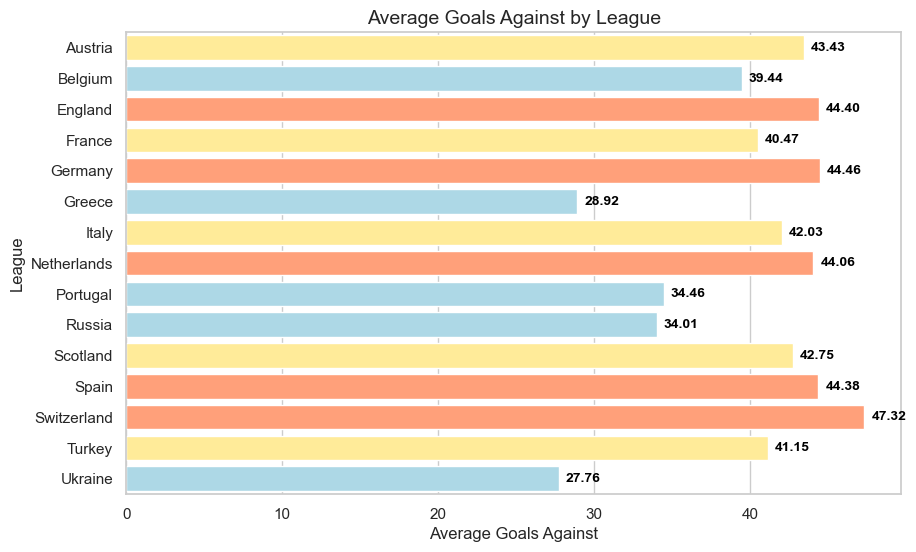

In [18]:
# Define light color shades for high, medium, and small goals_against categories
high_color = '#ffa07a'    # Light Salmon/Orange for high values
medium_color = '#ffeb99'  # Light Yellow for medium values
small_color = '#add8e6'   # Light Blue for small values

# Calculate the thresholds for small, medium, and high goals_against categories
goals_against_thresholds = [
    league_agg['goals_against'].quantile(0.33),
    league_agg['goals_against'].quantile(0.66)
]

# Function to determine color based on goals_against
def get_goals_against_color(value, thresholds):
    if value > thresholds[1]:
        return high_color
    elif value > thresholds[0]:
        return medium_color
    else:
        return small_color

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a barplot without specifying the palette, using errorbar=None to avoid the warning
bar_plot = sns.barplot(x='goals_against', y='league', data=league_agg, errorbar=None)

# Manually color the bars based on their goals_against value
for i, p in enumerate(bar_plot.patches):
    goals_against = league_agg['goals_against'].iloc[i]
    color = get_goals_against_color(goals_against, goals_against_thresholds)
    p.set_facecolor(color)
    
    # Annotate each bar with its goals_against value
    bar_plot.annotate(f'{goals_against:.2f}', 
                      xy=(goals_against, p.get_y() + p.get_height() / 2), 
                      xytext=(5, 0), 
                      textcoords='offset points', 
                      ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Set the title and labels with enhanced font size for clarity
plt.title('Average Goals Against by League', fontsize=14)
plt.xlabel('Average Goals Against', fontsize=12)
plt.ylabel('League', fontsize=12)

# Display the plot
plt.show()


+ **Lowest Goals Against:**

**Greece** and **Ukraine** have the lowest average **goals conceded**, with teams conceding around **29** and **28** goals per season, respectively. This indicates a strong defensive focus in these leagues, where teams prioritize preventing goals as a key strategy for success.

+ **Moderate Goals Against:**

**Portugal**, **Russia**, and **Turkey** also show relatively low goals against, averaging around **34** to **41** goals per season. These leagues maintain a **balanced** approach to **defense**, reflecting a strategy that emphasizes both **offensive** and **defensive** play.

+ **Highest Goals Against:**

**Spain** and **Switzerland** have the highest average **goals conceded**, with teams allowing around **44** to **47** goals per season. This could indicate a more open style of play in these leagues, where teams may focus more on scoring and less on defensive solidity.

+ **Balanced Leagues:**

**England**, **France**, **Germany**, and **Italy** exhibit average **goals conceded** around **40** to **44** per season, indicating a mix of strong defense and open play. These leagues are competitive and may have a higher average due to the intense competition among top teams.

#### 3. Summary

The league-wise analysis reveals significant financial and performance disparities across European football leagues. England, Italy, and Spain lead in revenue and spending, correlating with higher on-field success but also raising concerns about financial sustainability due to their negative net balances. In contrast, leagues like Portugal and the Netherlands maintain positive net balances through prudent financial management, demonstrating that competitive performance can be achieved with strategic spending.

The analysis highlights economic disparities within European football, where wealthier leagues attract top talent and dominate competitions, while lower-revenue leagues face challenges in retaining talent and competing at the highest levels. Different strategic focuses are evident across leagues: England and Spain emphasize offensive play, resulting in higher goals scored, whereas Ukraine and Greece prioritize strong defensive strategies.

Overall, the findings suggest that financial power is crucial for success, but sustainable financial management and strategic focus are equally important for long-term competitiveness. The correlation between financial resources and on-field success is clear, yet the ability to balance spending with financial health distinguishes the most sustainably successful leagues.

## V. Time-Series and Trend Analysis

#### 1. Financial Efficiency Over Time (All Leagues)

In this section, we examine the trends in financial efficiency across all European football leagues, analyzing the evolution of **average revenue**, **spending**, and **net** balance **over time**. This analysis provides insights into the financial growth and sustainability of these leagues.

In [19]:
# Aggregate key financial metrics by season across all leagues
season_agg = df.groupby('season').agg({
    'revenue': 'mean',
    'spent': 'mean',
    'net': 'mean',
}).reset_index()

season_agg

,season,revenue,spent,net
0,0,7.206676,10.264510,-3.057833
1,1,9.790145,13.700409,-3.910264
2,2,10.460379,14.815043,-4.354664
3,3,4.848455,7.638545,-2.790091
4,4,4.409870,8.188661,-3.778791
5,5,6.765512,10.470744,-3.705232
6,6,6.750630,9.276110,-2.525480
7,7,7.814764,11.178472,-3.363709
8,8,11.999215,16.655692,-4.656477
9,9,11.442346,15.896831,-4.454485


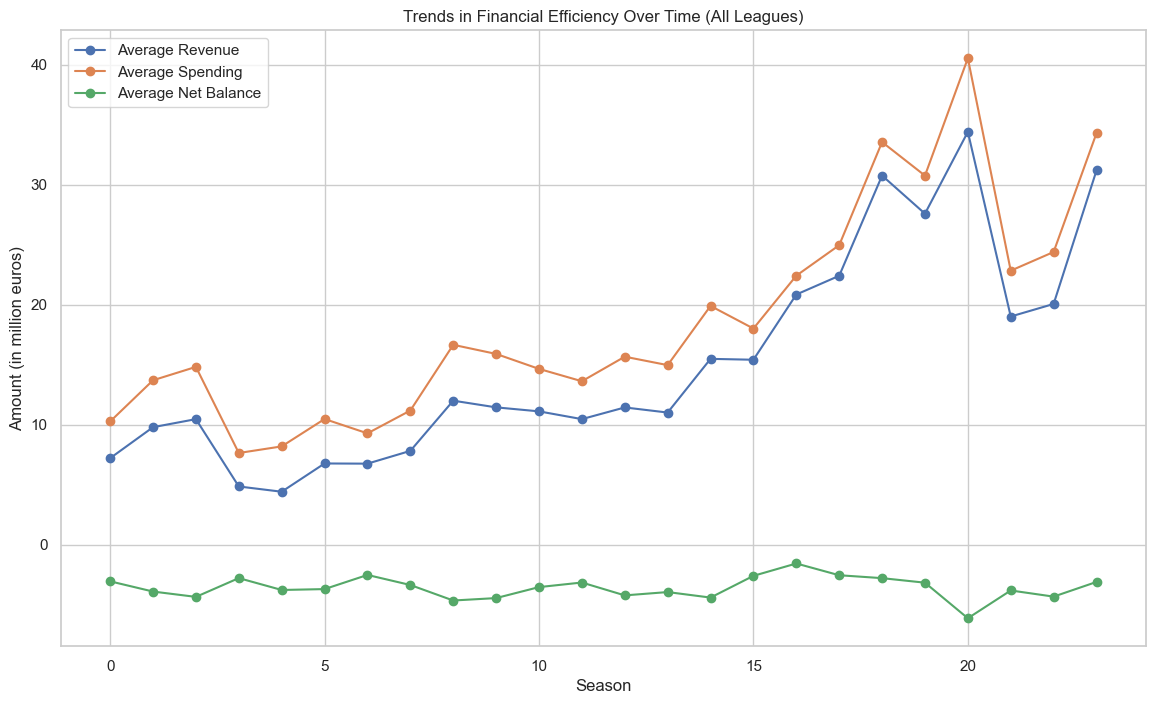

In [20]:
# Set up the figure size and layout for trend visualizations
plt.figure(figsize=(14, 8))

# Plot trends in financial metrics over time
plt.plot(season_agg['season'], season_agg['revenue'], label='Average Revenue', marker='o')
plt.plot(season_agg['season'], season_agg['spent'], label='Average Spending', marker='o')
plt.plot(season_agg['season'], season_agg['net'], label='Average Net Balance', marker='o')

# Customize the plot
plt.title('Trends in Financial Efficiency Over Time (All Leagues)')
plt.xlabel('Season')
plt.ylabel('Amount (in million euros)')
plt.legend()
plt.grid(True)
plt.show()

+ **Rising Revenue and Spending:**

Both **average revenue** and **average spending** show a general **upward trend** over the seasons. This indicates that European football leagues have increasingly generated and invested more money over time. The rise in revenue reflects increased commercial deals, sponsorships, and broadcasting rights, while the rise in spending suggests higher investments in player acquisitions and other football-related expenditures.

+ **Spending Outpacing Revenue:**

Notably, the **average spending** consistently stays **above** the **average revenue** for most seasons. This suggests that, on average, teams are spending more than they earn, which can lead to financial instability. This is a critical insight as it highlights the aggressive financial strategies of many teams, potentially leading to unsustainable practices.

+ **Stable but Negative Net Balance:**

The **green line **represents the **average net** balance, which **remains relatively stabl**e but mostly **negative** across the seasons. This indicates that, despite the increase in revenue, the majority of leagues are operating at a financial deficit, where spending exceeds revenue. The stability in the negative net balance underscores ongoing financial challenges within European football leagues, where increased earnings are not necessarily translating into financial health.

+ **Short-term Fluctuations:**

There are some noticeable **fluctuations** in both **revenue** and **spending**, particularly in the later seasons. These fluctuations may be due to external factors such as changes in **broadcasting deals**, **economic conditions**, or **shifts** in the competitive landscape of European football.

#### Summary

Financial Growth with Risks: The overall trend of rising revenue and spending suggests that European football leagues are growing financially. However, the consistent gap between spending and revenue raises concerns about long-term financial sustainability.
Need for Financial Discipline: The stable but negative net balance highlights the need for better financial discipline among leagues and teams to ensure that they do not overspend relative to their income, which could lead to long-term financial distress.
External Influences: The fluctuations in the later seasons might reflect the impact of broader economic or market changes, indicating that football finances are sensitive to external conditions.

#### 2. Comparative Analysis: Spain vs. England (The two most competitive and popular competitions)

In [21]:
# Filter the data for Spain and England
spain_england_df = df[df['league'].isin(['Spain', 'England'])]

# Aggregate financial metrics by season for Spain and England
spain_england_agg = spain_england_df.groupby(['season', 'league']).agg({
    'revenue': 'mean',
    'spent': 'mean',
    'net': 'mean',
}).reset_index()

spain_england_agg.head(10)

,season,league,revenue,spent,net
0,0,England,12.641250,22.130000,-9.488750
1,0,Spain,20.224000,21.591111,-1.367111
2,1,England,23.363333,29.565556,-6.202222
3,1,Spain,35.471111,38.060667,-2.589556
4,2,England,16.757556,36.456667,-19.699111
5,2,Spain,12.951111,30.760000,-17.808889
6,3,England,3.492000,19.184000,-15.692000
7,3,Spain,3.856667,13.297778,-9.441111
8,4,England,11.907000,32.504000,-20.597000
9,4,Spain,7.161111,14.766667,-7.605556


#### 2.1 Revenue Trends

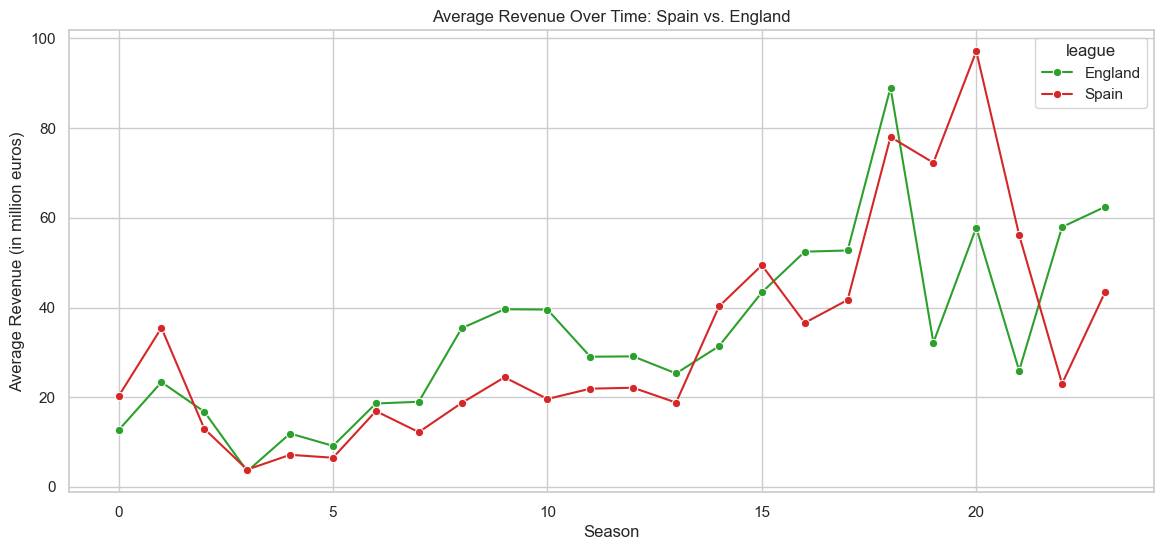

In [22]:
# Define a new custom color palette
custom_palette = sns.color_palette(["#2ca02c", "#d62728"]) 

# Plot Revenue trends with custom colors
plt.figure(figsize=(14, 6))
sns.lineplot(data=spain_england_agg, x='season', y='revenue', hue='league', marker='o', palette=custom_palette)
plt.title('Average Revenue Over Time: Spain vs. England')
plt.xlabel('Season')
plt.ylabel('Average Revenue (in million euros)')
plt.grid(True)
plt.show()

+ **Overall Growth in Revenue:**

Both leagues show an overall **increase** in **average revenue over time**, indicating that both **Spain** and **England** have experienced financial growth. This is likely due to factors such as increased television rights, sponsorship deals, and commercial activities.

+ **England's Revenue Leadership:**

For the majority of the seasons, the **English** league consistently **outperforms** **Spain** in terms of **revenue**. This trend highlights England’s financial dominance in European football, which can be attributed to the Premier League’s global appeal, lucrative broadcasting contracts, and a strong commercial presence.

+ **Revenue Fluctuations:**

Both leagues experience **fluctuations in revenue**, particularly in the **later seasons**. These fluctuations may be due to changes in broadcasting rights deals, performance in European competitions, or economic factors affecting sponsorship and commercial deals.

+ **Significant Peaks and Drops:**

**Spain** exhibits more dramatic **peaks** and **drops** in **revenue** compared to **England**. This could suggest that **Spanish league** revenue is more **sensitive** to certain factors, such as performance in international tournaments or changes in the economic landscape.

+ **Convergence and Divergence:**

There are periods where the **revenue** of both leagues **converges**, indicating similar financial performance, and periods where they diverge significantly, particularly in the later seasons where England's revenue surges ahead.

#### 2.2 Spending Trends

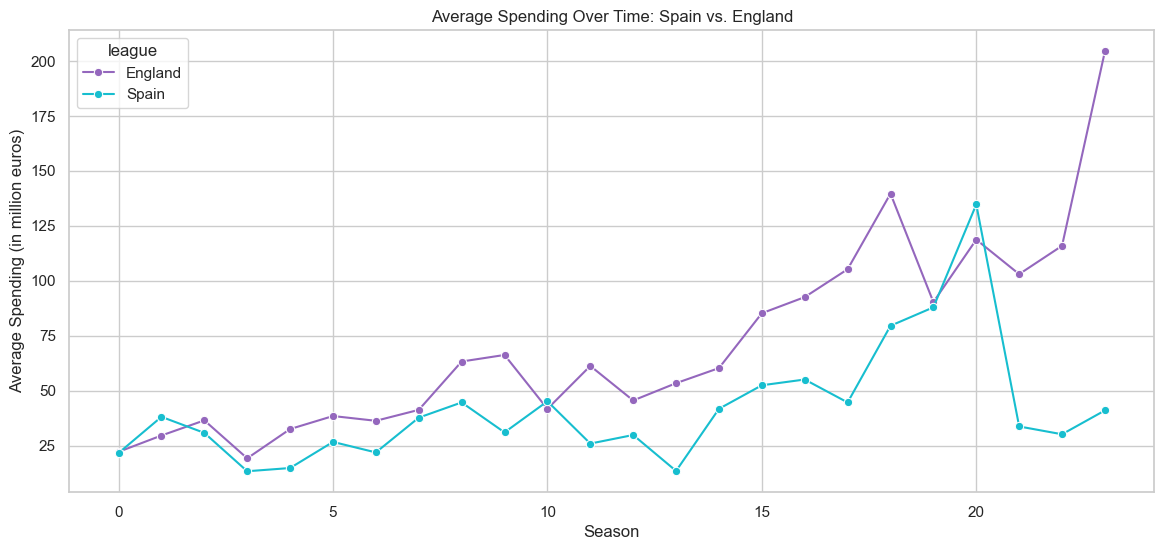

In [23]:
# Define a custom color palette with purple and teal
custom_palette = sns.color_palette(["#9467bd", "#17becf"]) 

# Plot Spending trends with custom colors
plt.figure(figsize=(14, 6))
sns.lineplot(data=spain_england_agg, x='season', y='spent', hue='league', marker='o', palette=custom_palette)
plt.title('Average Spending Over Time: Spain vs. England')
plt.xlabel('Season')
plt.ylabel('Average Spending (in million euros)')
plt.grid(True)
plt.show()

+ **Overall Increase in Spending:**

Both leagues show a general **upward trend** in spending over time, indicating that teams in both **Spain** and **England** have increasingly invested more in players, infrastructure, and other resources. This reflects the growing financial commitments required to stay competitive in European football.

+ **England’s Accelerated Spending:**

**England** shows a significantly steeper **increase in spending**, particularly in the later seasons. By the end of the observed period, the spending in **England** has surged far ahead of **Spain (cyan line), reaching nearly double the amount. This highlights the Premier League’s aggressive investment strategy, fueled by lucrative broadcasting deals and substantial commercial income.

+ **Spending Fluctuations:**

Both leagues experience **fluctuations** in their **spending**, with noticeable **peaks and troughs**. **Spain*, in particular, shows more pronounced **dips in spending**, suggesting a more cautious or reactive spending approach compared to **England**’s more consistent and aggressive investment pattern.

+ **Divergence in Later Seasons:**

In the later seasons, the gap between the two leagues widens significantly. England’s spending continues to rise sharply, while Spain’s spending growth is more **moderate** and shows a **few notable declines**. This divergence may be due to differing financial strategies, economic conditions, or priorities between the leagues.

#### 2.3 Net Balance Trends

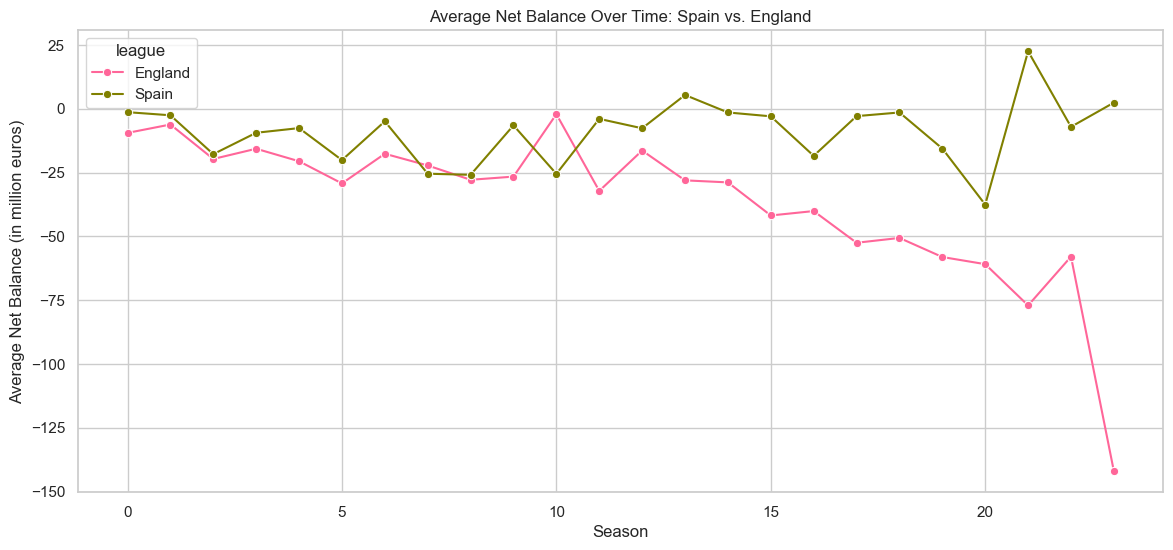

In [24]:
# Define a custom color palette with dark gray and olive
custom_palette = sns.color_palette(["#ff6699", "#808000"])  

# Plot Net Balance trends with custom colors
plt.figure(figsize=(14, 6))
sns.lineplot(data=spain_england_agg, x='season', y='net', hue='league', marker='o', palette=custom_palette)
plt.title('Average Net Balance Over Time: Spain vs. England')
plt.xlabel('Season')
plt.ylabel('Average Net Balance (in million euros)')
plt.grid(True)
plt.show()

+ **Consistently Negative Net Balances:**

Both **Spain** and **England** show consistently **negative net balances** over time, indicating that teams in these leagues are spending more than they earn. This trend suggests a reliance on external financing or a willingness to operate at a deficit to maintain competitive performance.

+ **Divergence in Recent Seasons:**

In the earlier seasons, the net balances of both leagues are relatively close, with both operating at similar levels of deficit. However, in the later seasons, a clear divergence occurs. **Spain's net** balance stabilizes somewhat, while **England**'s net balance plummets significantly, particularly in the most recent season, where it reaches a new low.

+ **Spain's Relative Stability:**

Despite the overall **negative trend**, Spain's net balance shows periods of relative stability, with less severe fluctuations compared to England. This suggests that Spanish teams may be managing their finances slightly better or that they are more conservative in their spending compared to their English counterparts.

+ **England's Escalating Financial Risk:**

The sharp decline in England’s net balance in the final seasons indicates escalating financial risk. This could be due to increased spending without a proportional rise in revenue, reflecting a potentially unsustainable financial strategy.

#### 2.4 Summary

England's Financial Dominance and Risk: England consistently leads in revenue generation, cementing its status as the financial powerhouse of European football. This financial strength has enabled English teams to outspend their rivals, underscoring their commitment to maintaining a competitive edge both domestically and internationally. However, this aggressive spending strategy has led to a sharp decline in net balance, raising concerns about the long-term financial sustainability of the league. The trend suggests that while English teams are reaping short-term benefits on the field, they are also taking on significant financial risk.

Spain's Revenue Volatility and Cautious Strategy: In contrast, Spain's revenue shows more volatility, indicating a potential sensitivity to external factors that could impact financial stability. Despite increasing spending over time, Spanish teams have adopted a more measured and fluctuating approach compared to their English counterparts. This strategy reflects a focus on sustainability, although it still operates at a deficit. Spain’s relatively stable net balance suggests a cautious financial approach, aiming to balance competitive performance with financial prudence.

Global Appeal and Strategic Differences: The growing revenue in both leagues highlights the global appeal of European football. England's ability to consistently generate higher revenue points to its robust commercial strategies and global market reach. Meanwhile, the different investment approaches England's aggressive spending versus Spain's conservative strategy—underscore the diverse financial tactics employed by top European leagues. While both leagues are successful, their differing approaches raise important questions about financial management and long-term sustainability in football.

## VI. Conclusion

This project highlights the intricate balance between financial management and on-field success in European football leagues. Our analysis reveals that while top leagues like England, Spain, and Italy dominate in both revenue generation and spending, this financial power does not necessarily guarantee sustainability. The consistent trend of spending outpacing revenue across these leagues poses significant financial risks, as evidenced by the increasingly negative net balances, particularly in the Premier League.
Moreover, the correlation between spending and performance, while positive, is not absolute—indicating that strategic financial management is as crucial as the amount spent. Teams that manage their finances prudently, such as those in Portugal and the Netherlands, demonstrate that sustainable success is possible even with more modest resources.
In summary, the project underscores the need for European football leagues to adopt disciplined financial strategies to ensure long-term stability and success. As leagues continue to grow financially, the challenge will be to translate this growth into sustainable operations that not only enhance competitive performance but also secure the financial health of the club.
